# Campaña de marketing comercial de importante Tienda Minorista
 *** Análisis de respuesta de los clientes y predicción de compra de la membresía Gold***

**Contexto Comercial**: una Tienda grande está planeando una campaña de ventas de fin de año. Quieren lanzar una nueva oferta: una membresía dorada, que otorga un 20% de descuento en todas las compras, por sólo usd 499. Esa misma memebresía, habitualmente durante otros días, tiene un precio de usd 999.
Esta campaña será válida sólo para clientes existentes, y se está planificando realizarla a través de llamados telefónicos a ellos.
La Gerencia considera que la mejor manera de reducir el costo de la campaña es hacer un modelo predictivo que clasifique a los clientes que podrían comprar la oferta.

**Definición del objetivo**: predecir la probabilidad de que el cliente dé una respuesta positiva e identificar los diferentes factores que afectan la respuesta del cliente.


**Problema Comercial**:Se analizarán los datos proporcionados para identificar estos factores y luego construir un modelo de predicción para ver la probabilidad de que el cliente dé una respuesta positiva.
Los datos del Dataset fueron recopilados durante la campaña del año pasado.

**Contexto analítico:** Se me proporcionan los datos en un archivo CSV  (ubicado en un repositorio de Github, carpeta Data Science) con los detalles de los clientes existentes inscriptos en la Tienda desde 2012 al 2014 inclusive.


---



La pregunta concreta a responder sería:

*¿Cuál es el segmento de clientes existentes con mayor probabilidad de aceptar la oferta de la Campaña de la Tienda?*


---











**Tabla de Contenidos**

**1.** Presentación inicial del Dataset

  - 1.1 Análisis explotario inicial de datos



**2.** Análisis exploratorio en profundidad por variable (univariado, bivariado y multivariado)

  - 2.1. Distribución de la Variable *Respuesta*

  - 2.2.  Análisis demográfico de clientes

   
     2.2.1. Edad
   
     2.2.2  Estado Civil
  
     2.2.3. Nivel de Educación

     2.2.4  Ingresos

     2.2.5. Hijos

- 2.3. Comportamiento de Compra  

      2.3.1.  Compras realizadas por Canal y comportamiento digital

      2.3.2   Gastos en diferentes categorías de producto

      2.3.3  Análisis de últimas compras realizadas

-  2.4. Variable tiempo











**3.** Análisis general de correlación entre variables

**4.** Ingeniería de atributos y selección de variables

**5.**  Modelo Predictivo

- 5.1.   Selección de modelos: entrenamiento y testeo

      Aplicación de muestreo estratificado

      Aplicación de técnica SMOTE para balanceo de variable target

      Aplicación de métricas

      Optimización de hiperparámetros

  
6. Conclusiones finales





---



**1. Presentación inicial del Dataset**

Tal como se adelantó en la Introducción, los datos utilizados para el presente análisis y desarrollo, corresponden a clientes existentes de la tienda desde el año 2012 al 2014 inclusive. Se cuenta con datos demográficos de los clientes, tales como Estado Civil, Hijos, Nivel de Educación, Ingreso. Y al mismo tiempo, detalles del comportamiento de compras , ya sea por tipo de producto ( Vinos, Càrnicos, Pescados, Dulces), por canal de venta, descuentos , etc. Y como dato objetivo o variable target, se cuenta con la respuesta que han dado los clientes a la última Campaña de Marketing organizada por la tienda.

Detalles de las columnas:

**ID:** ID único de cada cliente

**Year_Birth:** Año Nacimiento

**Dt_Customer:** fecha de inscripción del cliente con la empresa

**Educaction:** nivel de educación del cliente

**Marital_Satatus:** estado civil del cliente

**Kidhome:** número de niños pequeños en el hogar del cliente

**Teenhome:** número de adolescentes en el hogar del cliente

**Income**: ingresos del cliente

**MntFishProducts:** la cantidad gastada en productos de pescado en los últimos 2 años

**MntMeatProducts:** la cantidad gastada en productos cárnicos en los últimos 2 años

**MntFruits:** la cantidad gastada en productos de frutas en los últimos 2 años

**MntSweetProducts:** cantidad gastada en productos dulces en los últimos 2 años

**MntWines:** la cantidad gastada en productos de vino en los últimos 2 años

**MntGoldProds:** la cantidad gastada en productos de oro en los últimos 2 años

**NumDealsPurchases**: número de compras realizadas con descuento

**NumCatalogPurchases:** número de compras realizadas utilizando el catálogo para ser enviado a través del correo.

**NumStorePurchases:**  número de compras realizadas directamente en las tiendas

**NumWebPurchases:** número de compras realizadas a través del sitio web de la tienda

**NumWebVisitsMonth:** número de visitas al sitio web de la tienda en el último mes

**Recency :** número de días desde la última compra

**Response (target)**: 1 si el cliente aceptó la oferta en la última campaña, 0 de lo contrario

**Complain:** 1 si el cliente se quejó en los últimos 2 años


In [86]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

!wget "link_to_font_files_download"
!unzip "download?family=font_file_name"

!mv font_file.ttf /usr/share/fonts/truetype/

!fc-cache -f -v
!pip install --upgrade pip

!pip install --upgrade Pillow

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done
--2023-10-02 12:48:26--  http://link_to_font_files_download/
Resolving link_to_font_files_download (link_to_font_files_download)... failed: Name or service not known.
wget: unable to resolve host address ‘link_to_font_files_download’
unzip:  cannot find or open download?family=font_file_name, download?family=font_file_name.zip or download?family=font_file_name.ZIP.

No zipfiles found.
mv: cannot stat 'font_file.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import pandas_profiling

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from pprint import pprint

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [152]:
url ='https://raw.githubusercontent.com/veroivega13/datasciencie/main/superstore_data.csv'
df = pd.read_csv(url )

df.head(5).style \
    .set_properties(**{'background-color': 'lightpurple',
                       'color': 'black',
                       'border-color': 'black',
                       'border-width': '3px',
                       'border-style': 'solid',
                       'text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightgrey'),
                                                    ('color', 'black'),
                                                    ('border-color', 'black'),
                                                    ('border-width', '3px'),
                                                    ('border-style', 'solid'),
                                                    ('text-align', 'center')]},
                       {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'violet')]}]) \
    .set_properties(**{'fontsize': 4}) \
    .background_gradient(cmap='Purples')


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.000000,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.000000,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.000000,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.000000,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.000000,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


**1.1. Análisis exploratorio inicial de datos**

---



In [153]:
profile=pandas_profiling.ProfileReport(df)
if hasattr(profile, 'set_html_style'):
    profile.set_html_style({'font-size': '13px'})
profile

Output hidden; open in https://colab.research.google.com to view.

*De acuerdo a este completo reporte inicial de los datos, el Dataframe con el que trabajaremos está compuesto por:  

- 22 columnas
- 2240 observaciones
- 24 valores perdidos o faltantes .
- No hay valores duplicados
- Hay 15 variables numéricas, 6 categóricas ( Educación, Estado Civil, Hijos pequeños , Hijos adolescentes, Response  y Complain), y 1 variable de tipo Date Time.

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

*De acuerdo al detalle aplicando .info, vemos que las varables object son 3:

- Educación
- Estado Civil
- Fecha de enrolamiento o inscripción dle cliente ( tipo Date time).

También observamos que los valores missing están en la columna Ingreso.

In [91]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.16,3246.66,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.81,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.11,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0



**2.** Análisis exploratorio en profundidad por variable (univariado, bivariado y multivariado)

   2.1. Distribución de la Variable Respuesta



In [92]:
# CANTIDAD DE 0 (respuesta negativa) y 1 ( respuesta positiva)
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

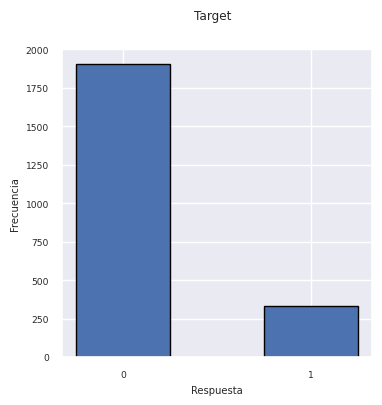

In [93]:
plt.figure(figsize = (4, 4))
plt.bar(df['Response'].value_counts().index,
        df['Response'].value_counts().values,width=0.5,edgecolor='black')
plt.suptitle('Target')
plt.xlabel('Respuesta')
plt.ylabel('Frecuencia')
plt.xticks(df['Response'].unique())
plt.show()

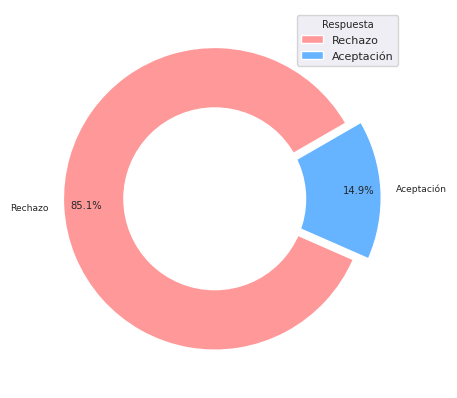

In [155]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.00,0.10)
labels = ['Rechazo','Aceptación']
plt.pie(df['Response'].value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', startangle=30, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.set_size_inches(6, 4)
fig.gca().add_artist(centre_circle)

plt.legend(title = "Respuesta",prop={'size': 8})
plt.tight_layout()
plt.show()


Como se puede observar claramente en los dos gráficos siguientes, sólo un 15% de los clientes ha aceptado positivamente la oferta de la tienda en la última campaña-

Esta distribución desbalanceada se deberá tener presente al momento de la aplicación del Modelo Predictivo.



---



2.2 Análisis demográfico de los clientes

  - 2.2.1. Edad

   Para un mejor análisis, se crea una columna de Edad de los clientes a partir de la fecha de nacimiento.

   Primero analizamos esta variable individualmente y luego hacemos un análisis bivariado con la target.

  

In [95]:
yr = 2023
df['Age'] = yr-df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.head(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,189,218,1,4,4,6,1,1,0,53
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,37,1,7,3,7,5,1,0,62
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,30,1,3,2,5,2,0,0,65
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,0,1,1,0,2,7,0,0,56
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,0,34,2,3,1,2,7,1,0,34


In [96]:
df['Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

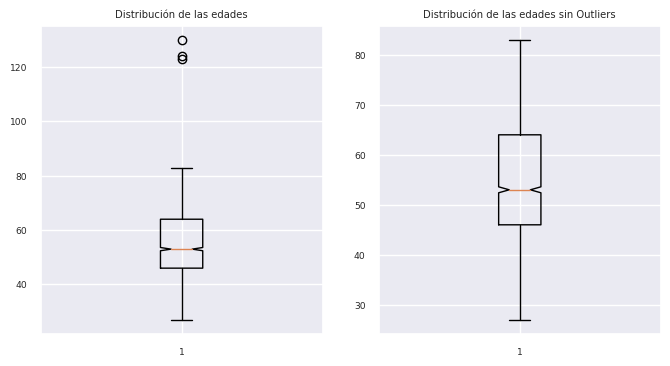

In [97]:
fig, axes = plt.subplots(ncols=2, nrows=1, sharex=False, sharey=False, figsize=(8,4))

axes[0].boxplot(df['Age'], notch=True)
axes[1].boxplot(df['Age'], notch=True, showfliers=False)

axes[0].set_title('Distribución de las edades')
axes[1].set_title('Distribución de las edades sin Outliers')


plt.show()

In [98]:
#Consiederando que los valores outliers cercanos a los 120 años de edad pueden deberse a un error o pueden restar al modelo, los eliminamos
df = df[df['Age'] < 100]
df['Age'].describe()

count    2237.000000
mean       54.098346
std        11.701917
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: Age, dtype: float64

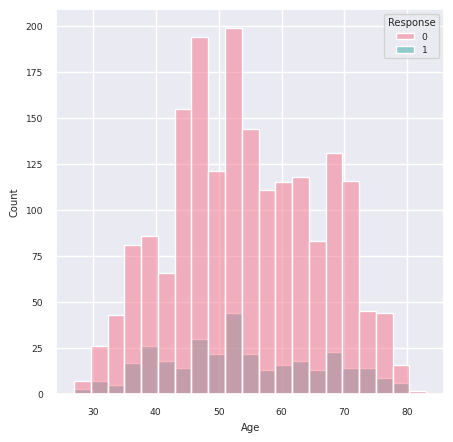

In [99]:
plt.figure(figsize = (5, 5))
sns.histplot(data = df, x = 'Age', hue='Response',palette='husl')
plt.show()

 Podemos observar que la Edad promedio de la cartera de clientes es de 54 años. Se observa un valor máximo de 130 años, que probablemente se deba a un error. La edad mínima es de 27 años.

   Los gráficos de distribución de las edades nos muestran una concentración entre el rango de 46 y 64 años. Se detectan tres valores sobre encima de los 120 años que no serán considerados para el análisis (outliers).
   Respecto a la relación de las edades de los clientes con la respuesta positiva a la campaña, se observa en principio que no hay correlación fuerte o directa entre ambas variables. Si bien, la mayor cantidad de aceptación se da dentro del rango de edad de mayor concentración, no es directo y también se observan porcentajes de aceptación en las edades fuera del rango principal.

 - 2.2.2  Estado Civil


   En primer lugar, como dato interesante se ve que hay 2 clases de Estado Civil muy poco comunes o inexistentes que son: Absurd y YOLO (you only live once), y la categoría Alone que tampoco es frecuente. Si bien la cantidad de clientes con estas categorías es insignificante sobre el total, respecto de la variable Target (Response) se observa que el 50% aceptó a oferta y el 50% la rechazó. Con lo cual, considerando la similitud del tipo de categoría con Single, se ha decidido convertir a  clase Single esos tres tipos de estado civil Por otro lado, vemos que más del 50% de los clientes están Casados o "Juntados". Pero cuando cruzamos los datos de Estado Civil y target, vemos que no siguen la misma tendencia, en cuanto a que por ejemplo: los clientes Single representan menos del 50% de los Married. Sin embrago, han tenido mayor cantidad absoluta de respuestas positivas a la oferta que los Married ( 106 vs. 98). También en los Divorciados la proporción de respuestas positivas es mayor que en los "Juntados". Parecerìa entonces que no hay una relación lineal entre el Estado Civil y respuesta positiva. Sí se podría mencionar, en un primer análisis, que los Single o Divorced, en proporción, tienen mayor aceptación de la oferta.



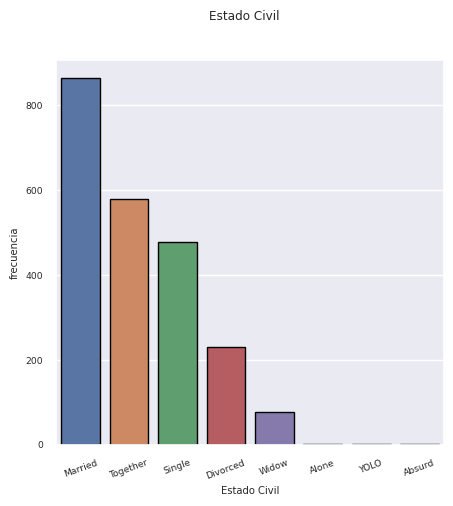

In [100]:
plt.figure(figsize = (5, 5))
sns.barplot(x = df['Marital_Status'].value_counts().index,
            y = df['Marital_Status'].value_counts().values,edgecolor='black')

plt.suptitle('Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('frecuencia')
plt.xticks(rotation=20)

plt.show()

In [101]:
pd.crosstab(df['Response'],df['Marital_Status'])

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Response,,,,,,,,
0,1,2,183,766,373,519,58,1
1,1,1,48,98,106,60,19,1


In [102]:
# AGRUPACIÓN DE TIPOS DE CATEGORÌAS DENTRO DE LA VARIABLE ESTADO CIVIL
# Las categorías Alone, YOLO (You only live once) y Absurd que serían similares a Single, las reemplazaré por este valor Single, consierando que son pocos valores.


df['Marital_Status'].replace({'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'}, inplace=True)
print(df['Marital_Status'].value_counts())
df.head(5)


Married     864
Together    579
Single      486
Divorced    231
Widow        77
Name: Marital_Status, dtype: int64


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,189,218,1,4,4,6,1,1,0,53
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,37,1,7,3,7,5,1,0,62
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,30,1,3,2,5,2,0,0,65
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,0,1,1,0,2,7,0,0,56
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,0,34,2,3,1,2,7,1,0,34


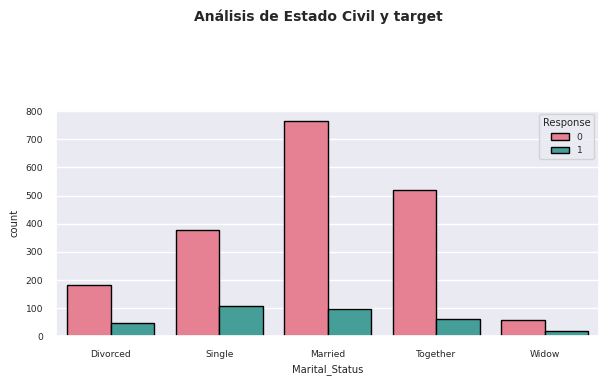

In [103]:

plt.figure(figsize = (7, 10))
plt.suptitle("Análisis de Estado Civil y target",fontweight="bold", fontsize=10)
plt.subplot(3,1,1)
sns.countplot(x = 'Marital_Status', hue = 'Response', palette = 'husl', data = df,edgecolor='black')
plt.show()

Cuando cruzamos los datos de Estado Civil y target, vemos que no siguen la misma tendencia, en cuanto a que por ejemplo: los clientes Single representan menos del 50% de los Married. Sin embrago, han tenido mayor cantidad absoluta de respuestas positivas a la oferta que los Married ( 106 vs. 98). También en los Divorciados la proporción de respuestas positivas es mayor que en los "Juntados". Parecerìa entonces que no hay una relación lineal entre el Estado Civil y respuesta positiva. Sí se podría mencionar, en un primer análisis, que los Single o Divorced, en proporción, tienen mayor aceptación de la oferta.

-  2.2.3.  Nivel de Educación




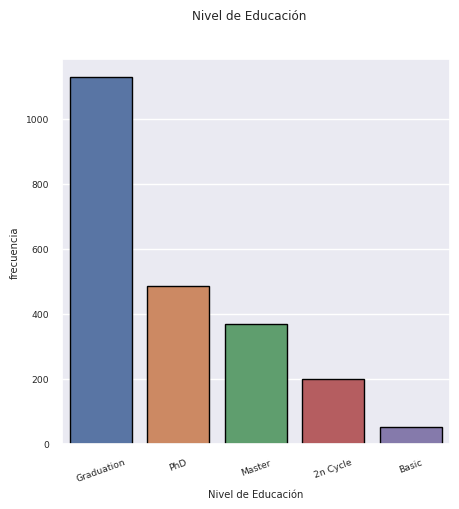

In [104]:

plt.figure(figsize = (5, 5))
sns.barplot(x = df['Education'].value_counts().index,
            y = df['Education'].value_counts().values,edgecolor='black')
plt.suptitle('Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('frecuencia')
plt.xticks(rotation=20)

plt.show()

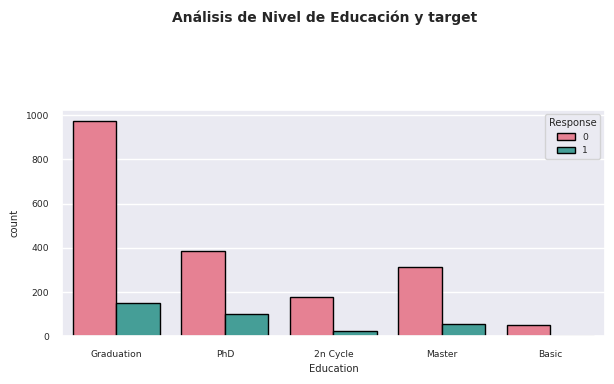

In [105]:
plt.figure(figsize = (7, 10))
plt.suptitle("Análisis de Nivel de Educación y target",fontweight="bold", fontsize=10)
plt.subplot(3,1,1)
sns.countplot(x = 'Education', hue = 'Response', palette = 'husl', data = df,edgecolor='black')
plt.show()


Este análisis muestra que aproximadamente el 50% de los clientes tienen nivel de Graduados ( que sería un paralelo de Nivel Secundario), y luego otro 35% aprox, de clientes tienen nivel de Doctorado o Master.

Respecto al nivel de Educación y la respuesta positiva a la oferta, tal como se ve en el gráfico bivariado, no se observa una correlación entre ambas variables.

- 2.2.4   Ingresos

En el siguiente análisis inicial de los datos, se detecta que en la columna Ingreso hay valores nulos.

Dado que el porcentaje de nulos no es importante (1.07 %), se decide reemplazarlos por la Mediana.

La media de Ingreso de los clientes es de usd 52.247 anuales. El 75% de los clientes tiene un ingreso de hasta usd 68.500 anuales. Hay un valor máximo outlier de usd 666.666 que puede corresponder en principio a un error ( por lo particular del número).






In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2213 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-nul

In [107]:
df['Income'].fillna(round(df['Income'].median()),inplace=True)
df['Income'] = df['Income'].astype('int64')


In [108]:
df['Income'].describe()

count      2237.000000
mean      52227.316495
std       25043.269927
min        1730.000000
25%       35523.000000
50%       51373.000000
75%       68281.000000
max      666666.000000
Name: Income, dtype: float64

In [109]:
#Consiederando que los valores outliers superiores a los usd 200.000 pueden restar al modelo, los eliminamos
df = df[df['Income'] < 200000]
df['Income'].describe()

count      2236.000000
mean      51952.522809
std       21411.469303
min        1730.000000
25%       35502.500000
50%       51373.000000
75%       68275.750000
max      162397.000000
Name: Income, dtype: float64

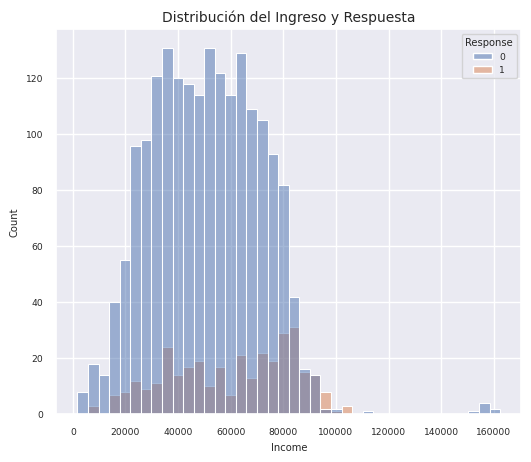

In [110]:

plt.figure(figsize = (6, 5))
sns.histplot(data = df, x = 'Income', hue='Response',bins=40)
plt.title('Distribución del Ingreso y Respuesta', fontsize = 10)
plt.show()

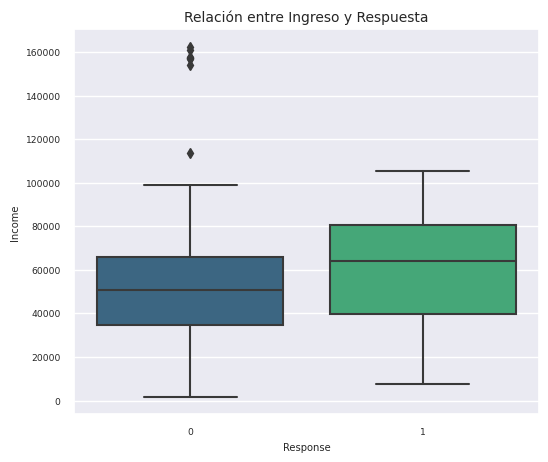

In [111]:
plt.rcParams['figure.figsize'] = (6, 5)
sns.boxplot(x=df['Response'], y=df['Income'], palette = 'viridis')
plt.title('Relación entre Ingreso y Respuesta', fontsize = 10)
plt.show()

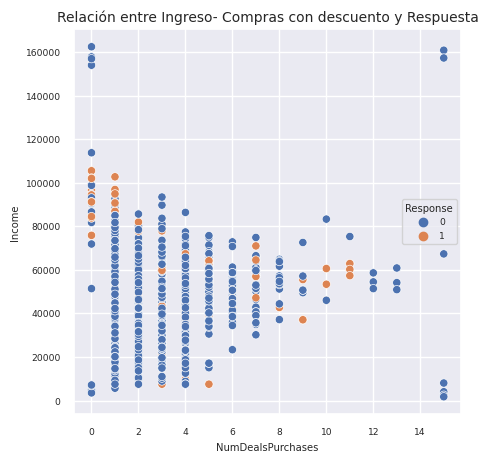

In [112]:

plt.figure(figsize = (5, 5))
sns.scatterplot( x='NumDealsPurchases',y='Income', data=df,hue='Response')
plt.title('Relación entre Ingreso- Compras con descuento y Respuesta', fontsize = 10)
plt.show()

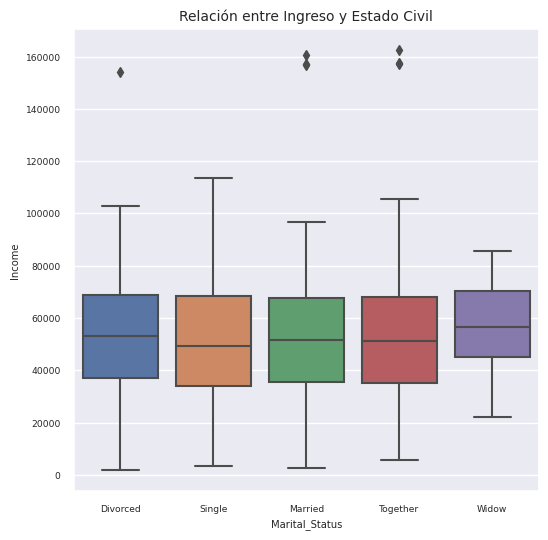

In [113]:

plt.figure(figsize=(6,6))
sns.boxplot(y = 'Income', x = 'Marital_Status', data = df)
plt.title('Relación entre Ingreso y Estado Civil', fontsize = 10)
plt.show()

Análisis de Ingreso vs productos consumidos  ==> 

Correlacion entre Ingreso y MntFruits ==>  0.5049115722508416


<Figure size 200x200 with 0 Axes>

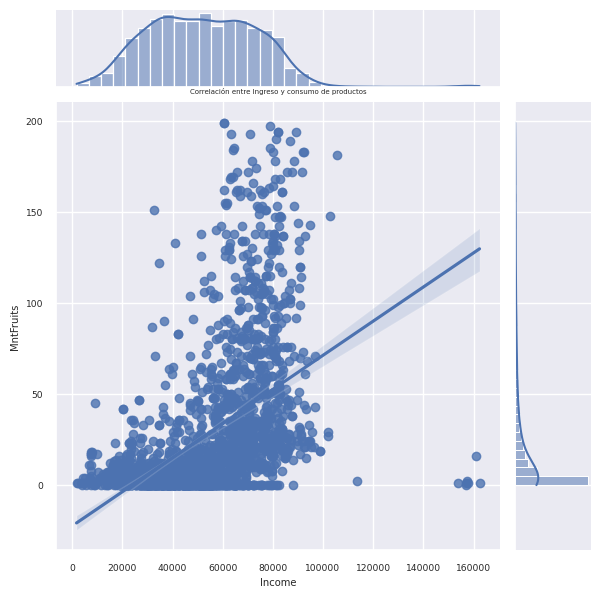

Correlacion entre Ingreso y MntMeatProducts ==>  0.6841761903944984


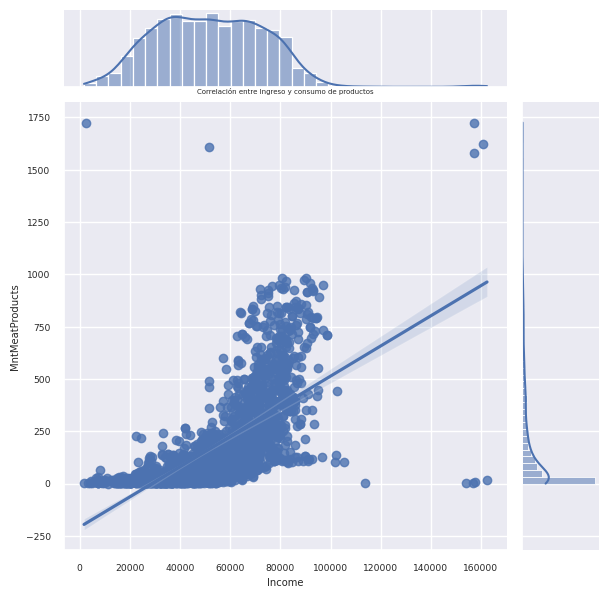

Correlacion entre Ingreso y MntFishProducts ==>  0.518462393382304


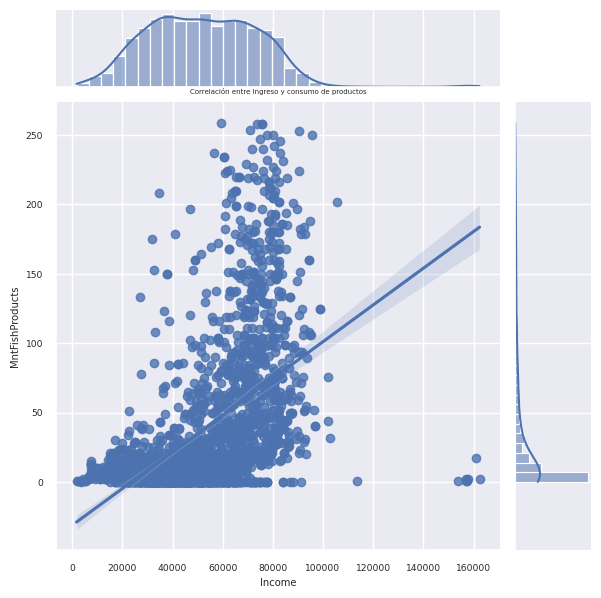

Correlacion entre Ingreso y MntGoldProds ==>  0.3835472174866483


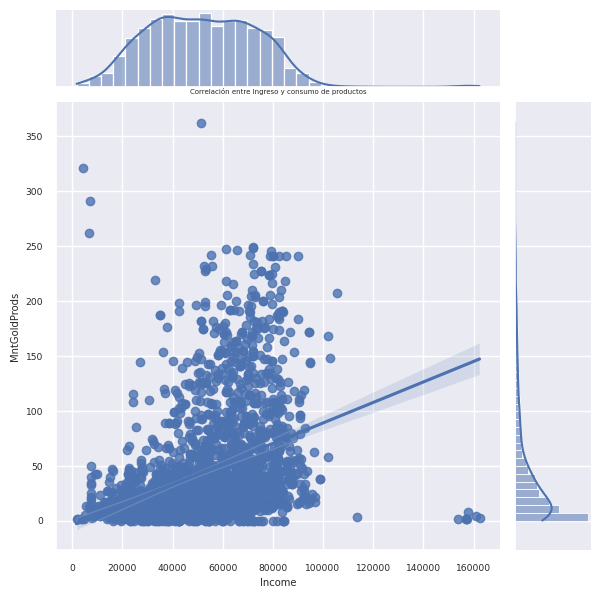

Correlacion entre Ingreso y MntWines ==>  0.686081664754373


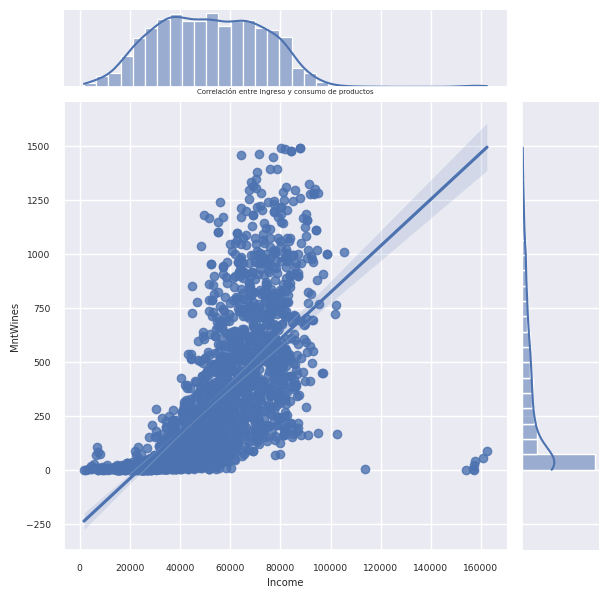

In [114]:
products_list=['Income','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','MntWines','MntSweetProducts' ]
col = products_list
idx = col.index('Income')

plt.figure(dpi = 100, figsize = (2,2))
print("Análisis de Ingreso vs productos consumidos  ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre Ingreso y {col[i]} ==> ",df.select_dtypes(exclude=object).corr().loc['Income'][col[i]])
    sns.jointplot(x='Income',y=col[i],data=df,kind = 'reg',palette = "Blues_d")
    plt.title('Correlación entre Ingreso y consumo de productos', fontsize = 5)
    plt.show()



---



Análisis de relación Ingreso y canales de compras ==> 

Correlacion entre Income  y NumDealsPurchases ==>  -0.10716942985533112


<Figure size 400x300 with 0 Axes>

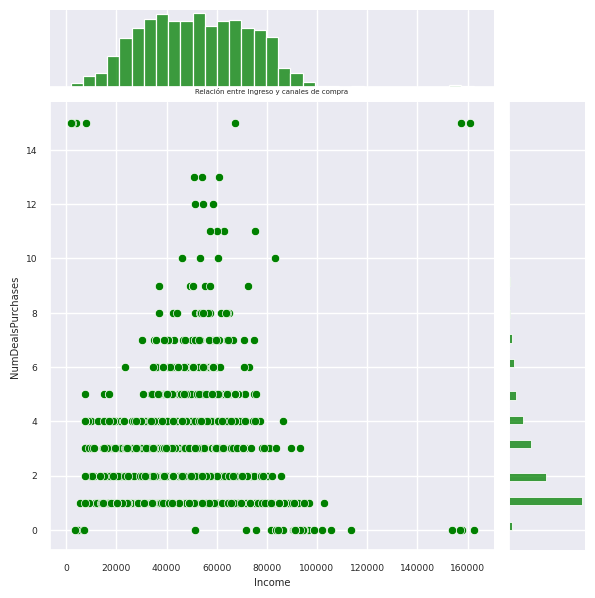

Correlacion entre Income  y NumWebPurchases ==>  0.45058448088422737


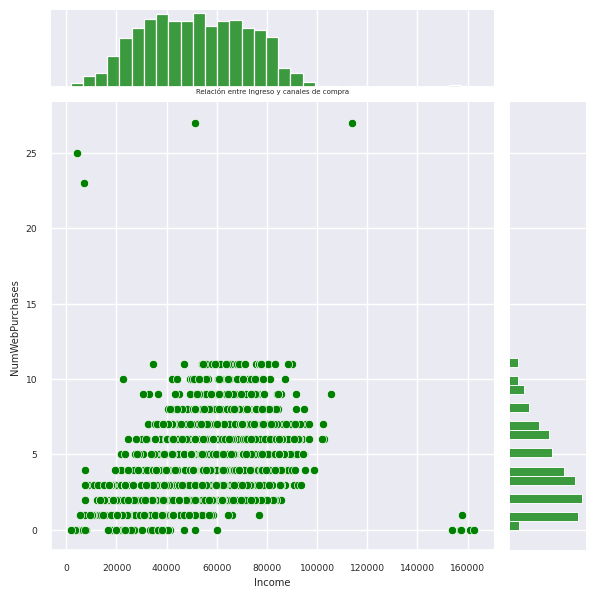

Correlacion entre Income  y NumCatalogPurchases ==>  0.6937823811449069


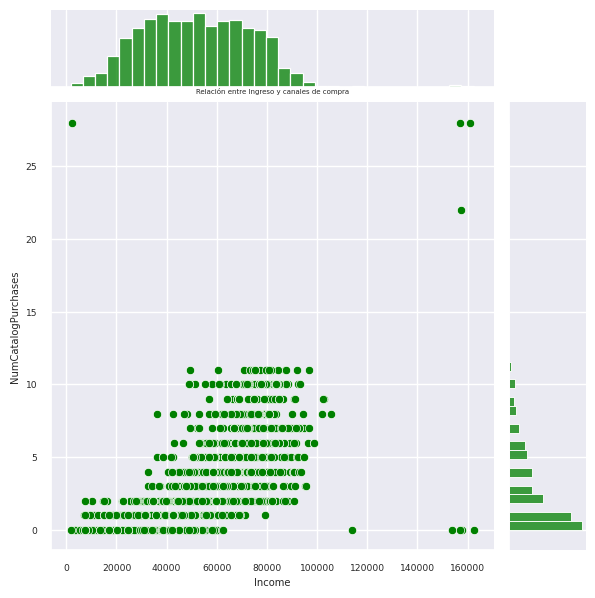

Correlacion entre Income  y NumStorePurchases ==>  0.62807653851727


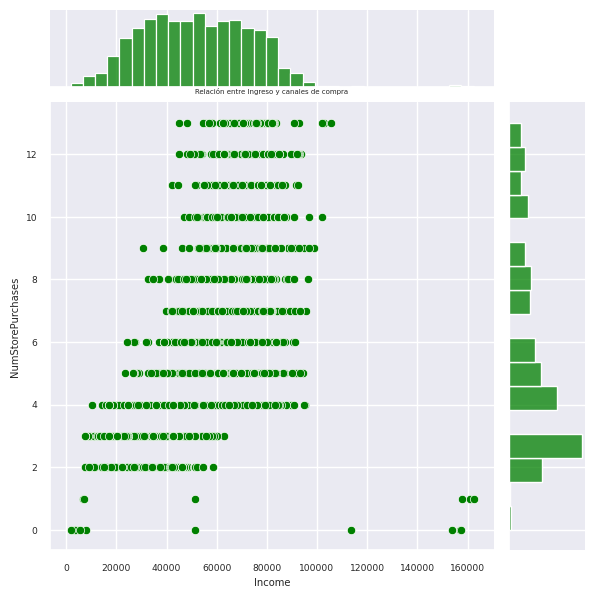

Correlacion entre Income  y NumWebVisitsMonth ==>  -0.6463814815923152


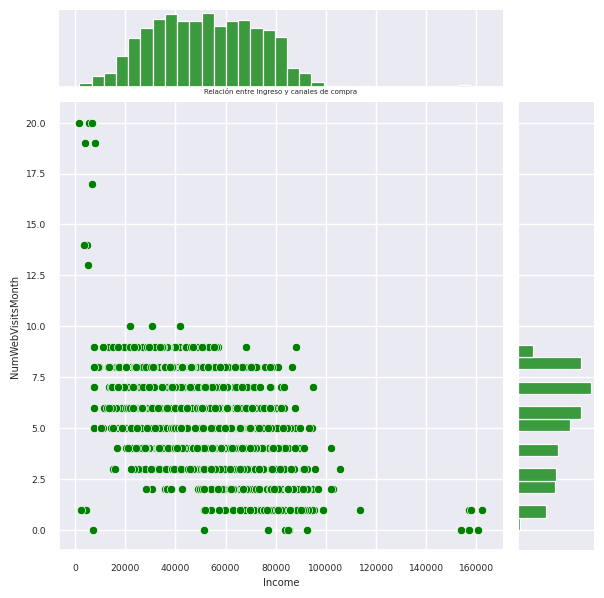

In [115]:

purchases_vars1 = ['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
col = purchases_vars1
idx = col.index('Income')

plt.figure(dpi=100, figsize=(4, 3))
print("Análisis de relación Ingreso y canales de compras ==> \n")
for i in range(idx + 1, len(col)):
    print(f"Correlacion entre Income  y {col[i]} ==> ", df.select_dtypes(exclude=object).corr().loc['Income'][col[i]])
    sns.jointplot(x='Income', y=col[i], data=df, kind='scatter', color='green')
    plt.title('Relación entre Ingreso y canales de compra', fontsize=5)
    plt.show()


A primera vista, observando el gráfico bivariado sobre la distribución del  Ingreso vs Target, no se destaca una correlación importante entre los ingresos de los clientes y la respuesta positiva a la oferta. Sí se observa, en el gráfico bloxpot comparando Ingreso / Respuesta que los que aceptaron la oferta (1) están dentro de una franja de mayores ingresos.
En el gráfico bivariado que analiza la relación Estado Civil e Ingreso, se observa, en general, todos los estados civiles tienen un rango promedio similar de ingresos.

En los gráficos que se analiza el Ingreso respecto del consumo de los diferentes productos, vemos una relación lineal: a mayor ingreso, mayor consumo de productos, sobre todo en los productos: carne y vinos.

Si observamos los gráficos de dispersión de los ingresos respecto a la cantidad de  compras con descuento, vemos que **no** hay una correlación entre lo que podría ser, por ejemplo, mayor ingreso, menor cantidad de compras con descuentos, o de la misma forma, menor ingreso, mayor cantidad de compras con descuento. Al mismo tiempo se observa una leve relación positiva entre el Ingreso y las compras en tienda, compras por catálogo y compras a través de la web. Y una leve relación negativa entre Ingreso y cantidad de visitas a la web.


-  2.2.5  Hijos

Podemos ver que un 44% aprox. de los clientes tiene niños en casa y un 51% aprox. tiene adolescentes en casa.
Respecto a la relación de hijos en casa con la variable target, no se detecta una correlación directa entre hijos niños y aceptación o hijos adolescentes y aceptación de la oferta.
Si analizamos los gràficos de correlación entre hijos y consumo de productos y canales de compra, se pueden observar lo siguiente:
- Los clientes que tienen hijos pequeños en casa, consumirían menos productos en general, que los que no tienen niños en casa. Y comprarían menos a través web y catálogo, pero sí comprarían más (pequeña relación lineal positiva) con descuento.
- Respecto a los clientes con hijos adolescentes en casa, también hay una tendencia a consumir menos productos cárnicos, pescado, frutas, que los que no tienen hijos adolescentes. Pero respecto al producto vinos, parecería que cuantos más hijos adolescentes, se consume más alcohol. Respecto a los canales de compra, se puede ver que cuando hay adolescentes en la casa la tendencia es a realizar más compras con descuentos y vía web.

In [116]:
df[['Kidhome','Teenhome']].sum()


Kidhome      993
Teenhome    1133
dtype: int64

In [117]:
df[['Kidhome','Teenhome']].describe().round(2)

,Kidhome,Teenhome
count,2236.00,2236.00
mean,0.44,0.51
std,0.54,0.54
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,1.00,1.00
max,2.00,2.00


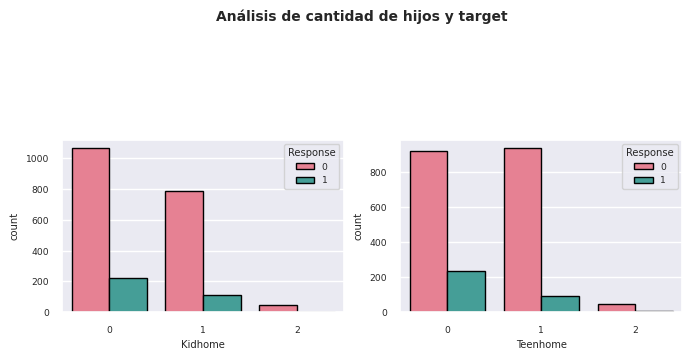

In [118]:
children_in_home = ['Kidhome','Teenhome']

plt.figure (figsize = (8, 13))
plt.suptitle("Análisis de cantidad de hijos y target",fontweight="bold", fontsize=10)
for i in range(len(children_in_home)):
    plt.subplot(5,2,i+1)
    sns.countplot(x = children_in_home[i], hue = 'Response', palette = 'husl', data = df,edgecolor='black')

Correlación entre Niños en casa y consumo de productos

Análisis de Niños en casa vs productos consumidos  ==> 

Correlacion entre Niños en casa y MntFruits ==>  -0.3724421264901669


<Figure size 500x500 with 0 Axes>

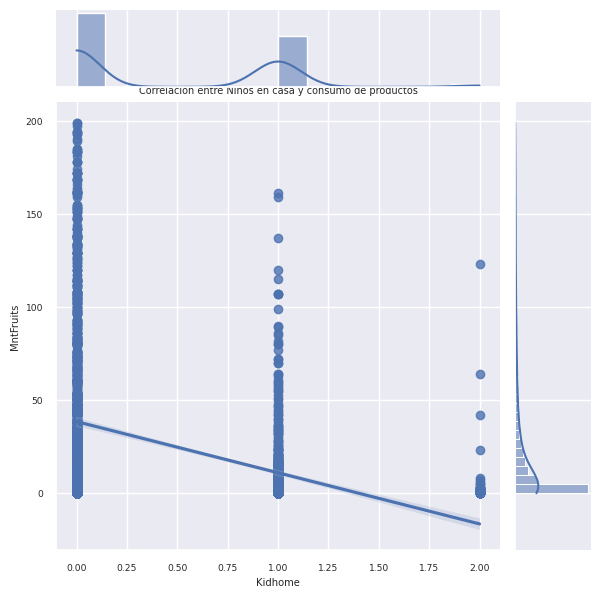

Correlacion entre Niños en casa y MntMeatProducts ==>  -0.4369007372433847


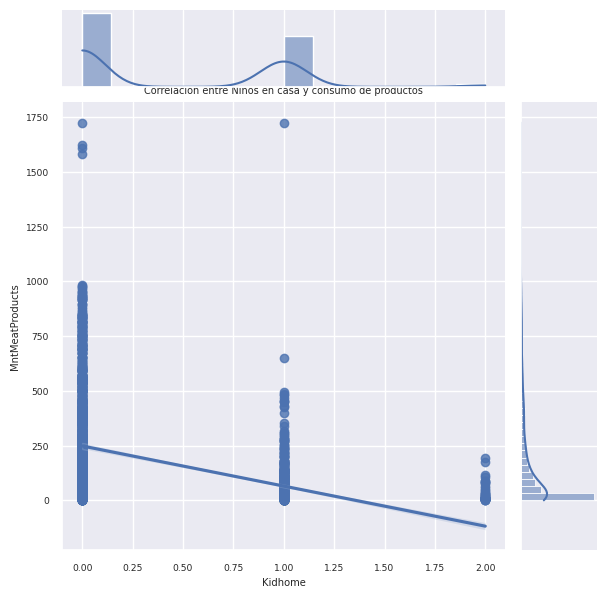

Correlacion entre Niños en casa y MntFishProducts ==>  -0.3874041978827401


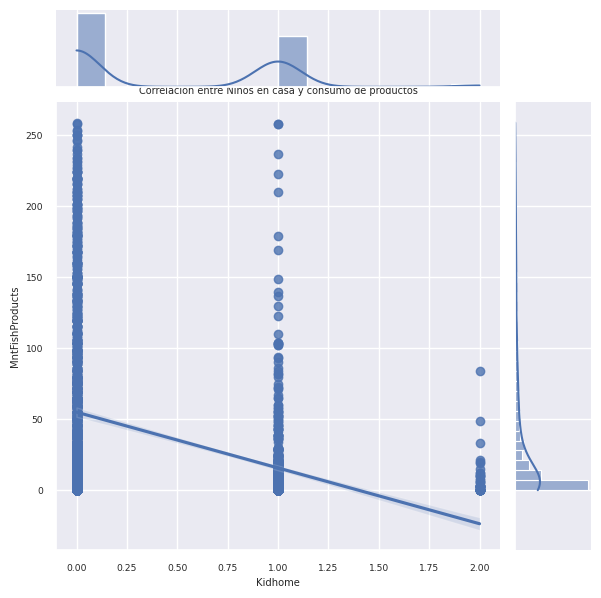

Correlacion entre Niños en casa y MntGoldProds ==>  -0.34946191935272564


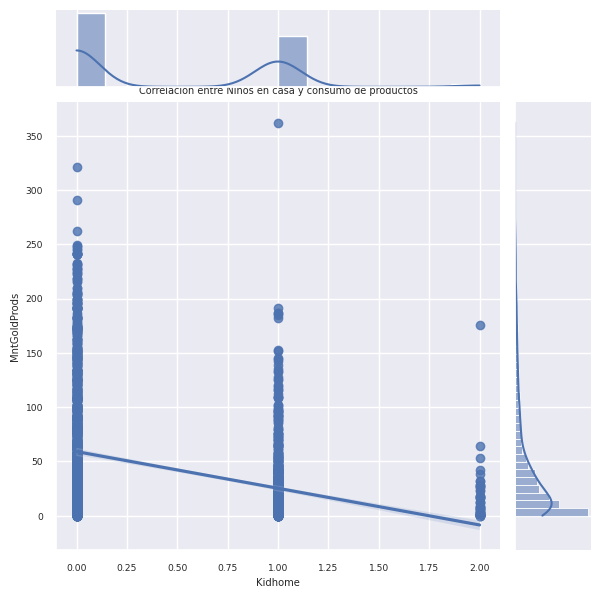

Correlacion entre Niños en casa y MntWines ==>  -0.4961656482104823


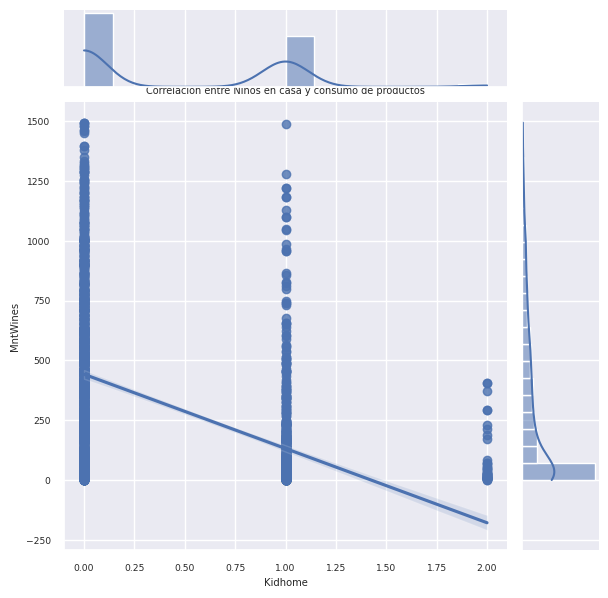

In [119]:
Kidhome_list=['Kidhome','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','MntWines','MntSweetProducts' ]
col = Kidhome_list
idx = col.index('Kidhome')

plt.figure(dpi = 100, figsize = (5,5))
print("Análisis de Niños en casa vs productos consumidos  ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre Niños en casa y {col[i]} ==> ",df.select_dtypes(exclude=object).corr().loc['Kidhome'][col[i]])
    sns.jointplot(x='Kidhome',y=col[i],data=df,kind = 'reg',palette = "Blues_d")
    plt.title('Correlación entre Niños en casa y consumo de productos', fontsize = 7)
    plt.show()

Correlación entre Adolescentes en casa y consumo de productos

Análisis de Adolescentes en casa vs productos consumidos  ==> 

Correlacion entre Adolescentes en casa y MntFruits ==>  -0.17611714064212067


<Figure size 400x400 with 0 Axes>

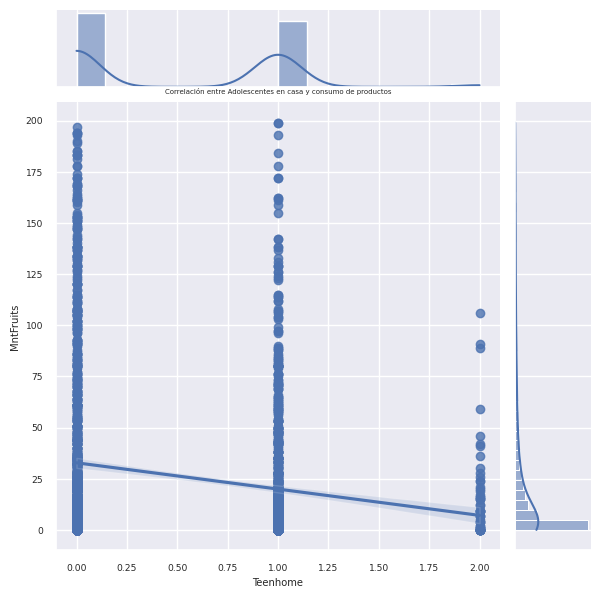

Correlacion entre Adolescentes en casa y MntMeatProducts ==>  -0.2611710384564799


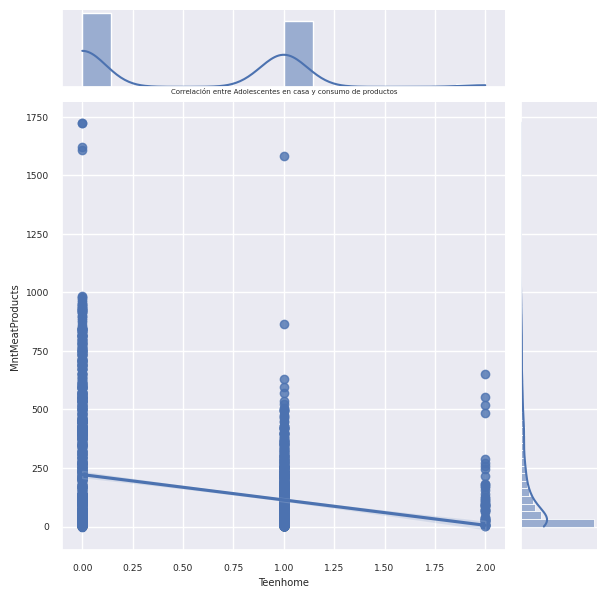

Correlacion entre Adolescentes en casa y MntFishProducts ==>  -0.20417746929762134


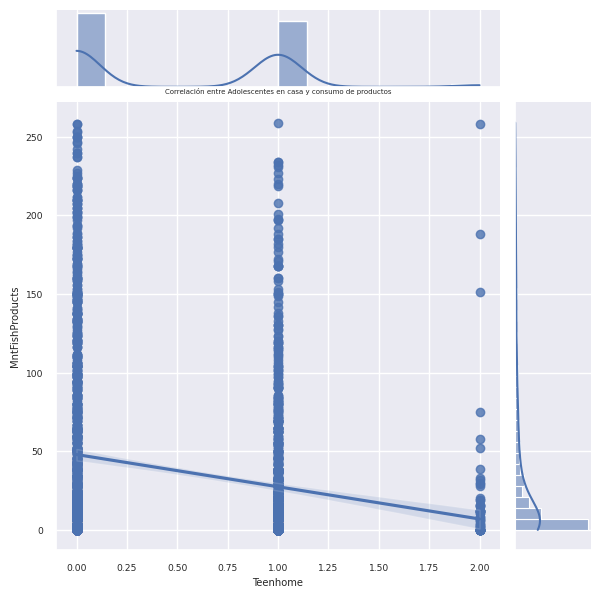

Correlacion entre Adolescentes en casa y MntGoldProds ==>  -0.02044747829166802


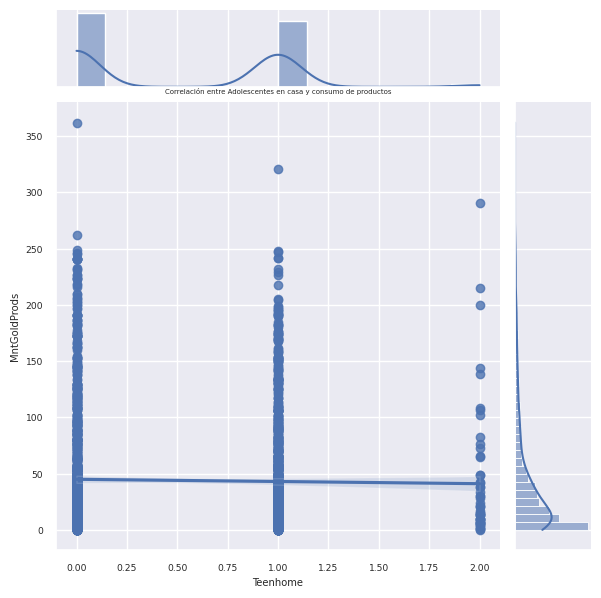

Correlacion entre Adolescentes en casa y MntWines ==>  0.005046588707796895


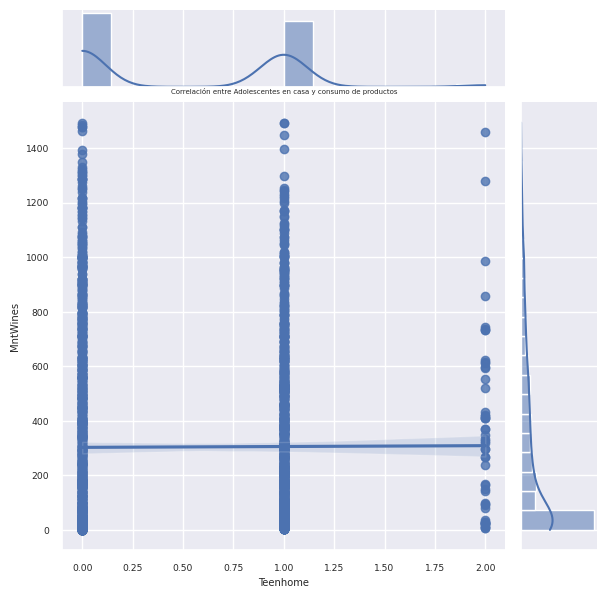

In [120]:
Teenhome_list=['Teenhome','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','MntWines','MntSweetProducts' ]
col = Teenhome_list
idx = col.index('Teenhome')

plt.figure(dpi = 100, figsize = (4,4))
print("Análisis de Adolescentes en casa vs productos consumidos  ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre Adolescentes en casa y {col[i]} ==> ",df.select_dtypes(exclude=object).corr().loc['Teenhome'][col[i]])
    sns.jointplot(x='Teenhome',y=col[i],data=df,kind = 'reg',palette = "Blues_d")
    plt.title('Correlación entre Adolescentes en casa y consumo de productos', fontsize = 5)
    sns.despine()
    plt.show()

Correlación entre Niños en casa y canales de compra

Análisis de Niños en casa vs canales de compra  ==> 

Correlacion entre Niños en casa y canales de compraNumDealsPurchases ==>  0.2214888003107391


<Figure size 500x500 with 0 Axes>

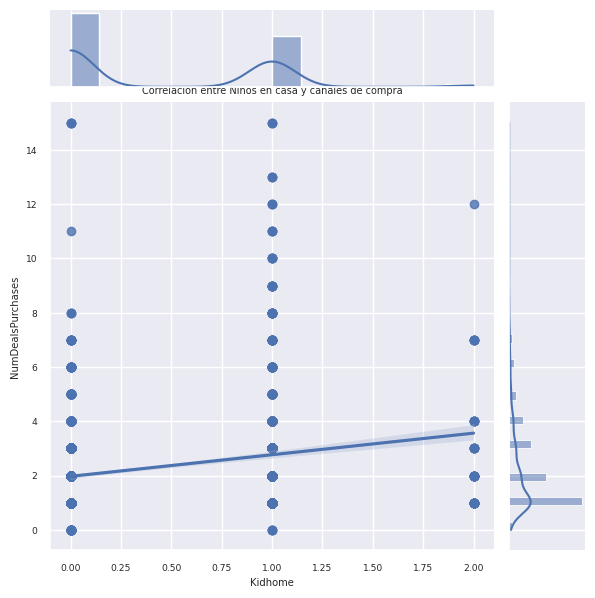

Correlacion entre Niños en casa y canales de compraNumWebPurchases ==>  -0.3619815001907686


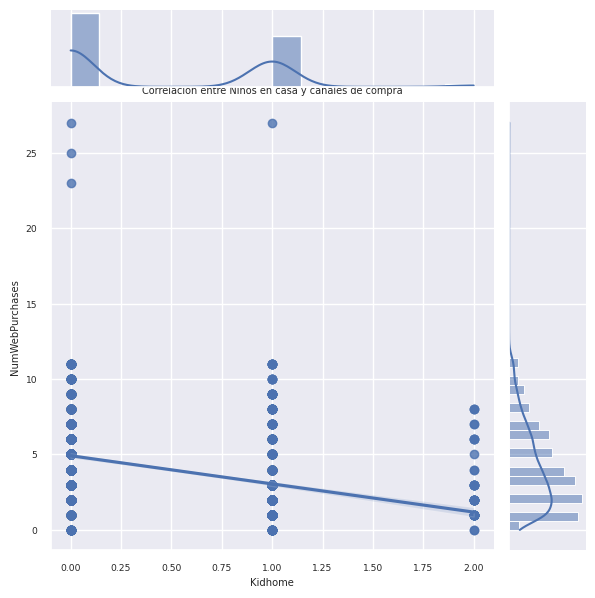

Correlacion entre Niños en casa y canales de compraNumCatalogPurchases ==>  -0.5023313406256156


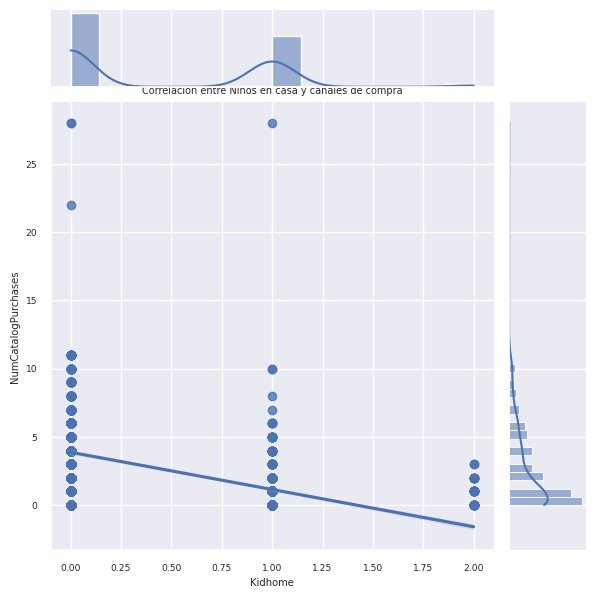

In [121]:
Kidhome_list2=['Kidhome', "NumDealsPurchases",'NumWebPurchases',"NumCatalogPurchases",
               "NumStorePurchases"]
col = Kidhome_list2
idx = col.index('Kidhome')

plt.figure(dpi = 100, figsize = (5,5))
print("Análisis de Niños en casa vs canales de compra  ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre Niños en casa y canales de compra{col[i]} ==> ",df.select_dtypes(exclude=object).corr().loc['Kidhome'][col[i]])
    sns.jointplot(x='Kidhome',y=col[i],data=df,kind = 'reg',palette = "Green")
    plt.title('Correlación entre Niños en casa y canales de compra', fontsize = 7)
    plt.show()

Análisis de Adolescentes en casa vs canales de compra

Análisis de Adolescentes en casa vs canales de compra  ==> 

Correlacion entre Adolescentes en casa y canales de compraNumDealsPurchases ==>  0.3882926233465797


<Figure size 500x500 with 0 Axes>

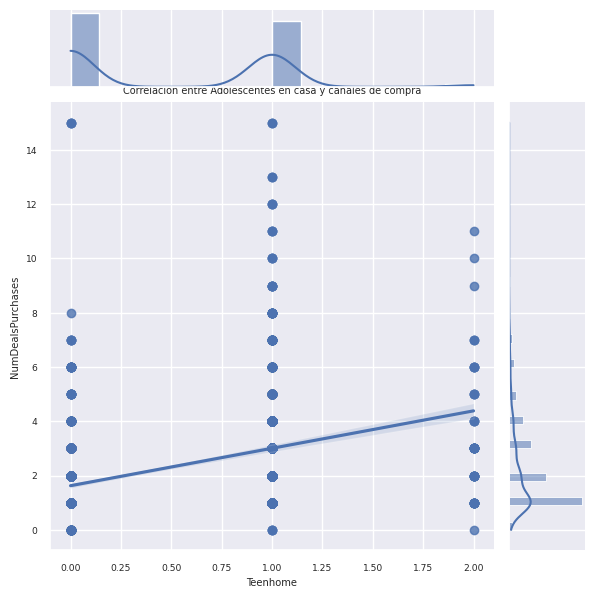

Correlacion entre Adolescentes en casa y canales de compraNumWebPurchases ==>  0.15564875661208433


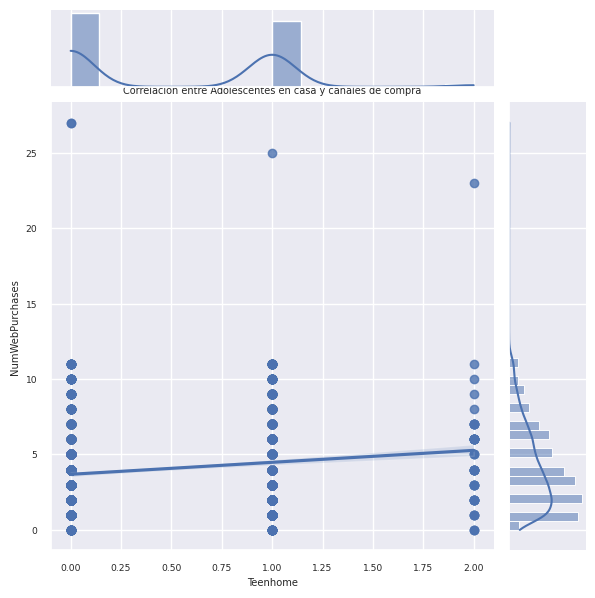

Correlacion entre Adolescentes en casa y canales de compraNumCatalogPurchases ==>  -0.11055112374510306


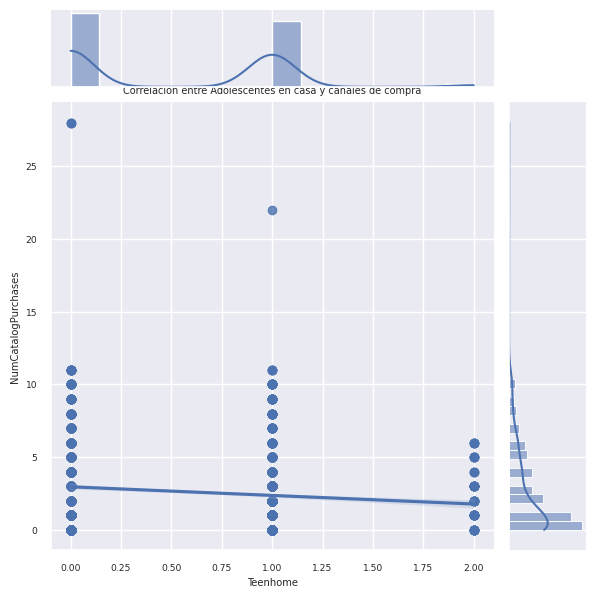

In [122]:
Teenhome_list2=['Teenhome', "NumDealsPurchases",'NumWebPurchases',"NumCatalogPurchases",
               "NumStorePurchases"]
col = Teenhome_list2
idx = col.index('Teenhome')

plt.figure(dpi = 100, figsize = (5,5))
print("Análisis de Adolescentes en casa vs canales de compra  ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre Adolescentes en casa y canales de compra{col[i]} ==> ",df.select_dtypes(exclude=object).corr().loc['Teenhome'][col[i]])
    sns.jointplot(x='Teenhome',y=col[i],data=df,kind = 'reg',palette = "Green")
    plt.title('Correlación entre Adolescentes en casa y canales de compra',fontsize = 7)
    plt.show()

Podemos ver que un 44% aprox. de los clientes tiene niños en casa y un 51% aprox. tiene adolescentes en casa.
Respecto a la relación de hijos en casa con la variable target, no se detecta una correlación directa entre hijos niños y aceptación o hijos adolescentes y aceptación de la oferta.
Si analizamos los gràficos de correlación entre hijos y consumo de productos y canales de compra, se pueden observar lo siguiente:
- Los clientes que tienen hijos pequeños en casa, consumirían menos productos en general, que los que no tienen niños en casa. Y comprarían menos a través web y catálogo, pero sí comprarían más (pequeña relación lineal positiva) con descuento.
- Respecto a los clientes con hijos adolescentes en casa, también hay una tendencia a consumir menos productos cárnicos, pescado, frutas, que los que no tienen hijos adolescentes. Pero respecto al producto vinos, parecería que cuantos más hijos adolescentes, se consume más alcohol. Respecto a los canales de compra, se puede ver que cuando hay adolescentes en la casa la tendencia es a realizar más compras con descuentos y vía web.

2.3 Comportamiento de compras

  - 2.3.1. Compras por canal:



In [123]:
df[["NumDealsPurchases",'NumWebPurchases',"NumCatalogPurchases","NumStorePurchases"]].sum()

NumDealsPurchases       5201
NumWebPurchases         9140
NumCatalogPurchases     5955
NumStorePurchases      12959
dtype: int64

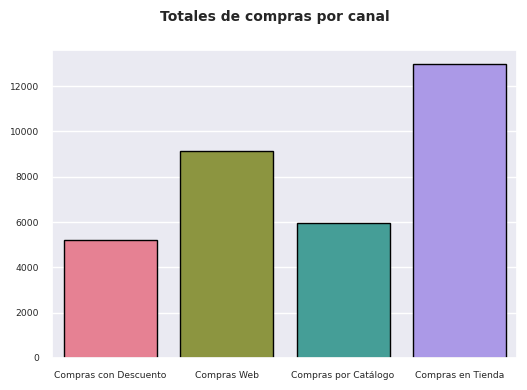

In [124]:

canal_list = ['Compras con Descuento','Compras Web', 'Compras por Catálogo', 'Compras en Tienda']

sum_columns = df[["NumDealsPurchases",'NumWebPurchases',"NumCatalogPurchases","NumStorePurchases"]].sum()
plt.figure(figsize=(6,4))
plt.suptitle("Totales de compras por canal ",fontweight="bold", fontsize=10)
sns.barplot(y=sum_columns, x=canal_list, palette='husl', data=df, edgecolor='black')

plt.show()



Index(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases'],
      dtype='object')


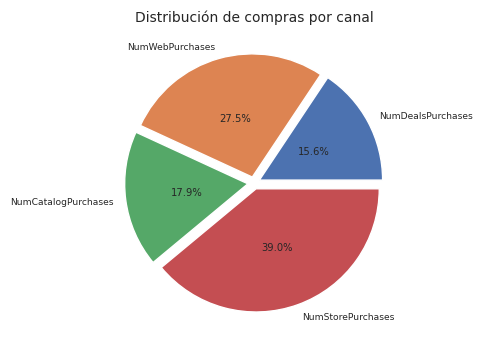

In [125]:
sum_columns = df[["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum()
labels = sum_columns.index
print(labels)

explode = [0.05] * len(sum_columns)
pie, ax = plt.subplots(figsize=[8,4])
plt.pie(x=sum_columns, autopct="%.1f%%", labels=labels, explode=explode, pctdistance=0.5)
plt.title("Distribución de compras por canal", fontsize=10)
plt.show()


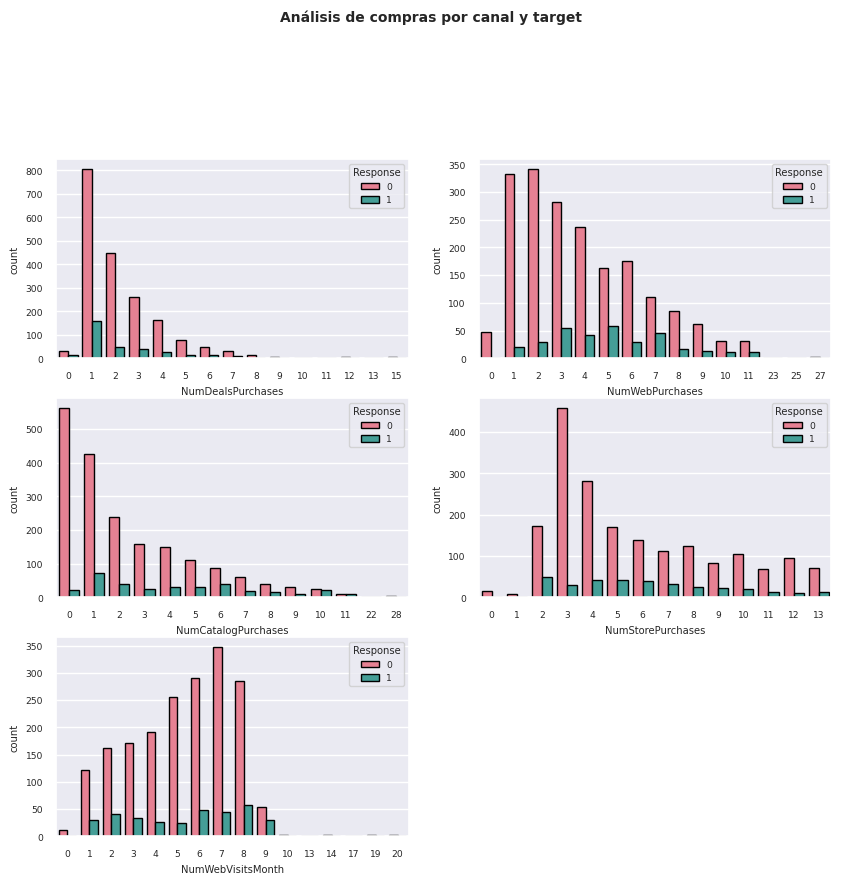

In [126]:
purchases_vars = ["NumDealsPurchases",'NumWebPurchases',"NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]

plt.figure (figsize = (10, 15))
plt.suptitle("Análisis de compras por canal y target",fontweight="bold", fontsize=10)
for i in range(len(purchases_vars)):
    plt.subplot(5,2,i+1)
    sns.countplot(x = purchases_vars[i], hue = 'Response', palette = 'husl', data = df,edgecolor='black')


In [127]:
df['NumWebVisitsMonth'].describe()

count    2236.000000
mean        5.318873
std         2.426886
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

   A través de los gráficos, se observa que la mayor cantidad de compras se da directamente en la  en la tienda directamente y en segundo lugar:  vía web.
   Respecto a la aceptación de la oferta, sí se observa una relación directa entre las compras con descuento y la respuesta positiva, y al mismo tiempo también se observa una relación proporcional entre las compras vía web y la aceptación de la oferta de la tienda.
   Por otro lado, podemos observar que la interacción de los clientes con la Tienda a través de la web es buena, el promedio de visitas a la web del último mes es de 5.3 por cliente y en la mayoría de estos casos, la aceptación de la oferta está por encima del 15% general. Con lo cual podríamos inferir que las visitas a la web de los cliente ayudan o incentivan a que tengan una mayor aceptación de la oferta ofrecida.

-  2.3.2. Gastos en diferentes categorías de productos



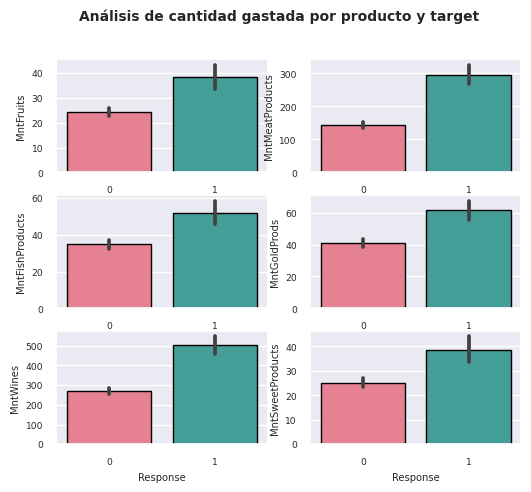

In [128]:
products_list=['MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','MntWines','MntSweetProducts' ]

plt.figure.figsize = (9, 14)
plt.suptitle("Análisis de cantidad gastada por producto y target ",fontweight="bold", fontsize=10)
for i in range(len(products_list)):
    plt.subplot(3,2,i+1)
    sns.barplot(y =products_list[i], x = 'Response' ,  palette = 'husl', data = df,edgecolor='black')

In [129]:
df[['MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','MntWines','MntSweetProducts']].sum()


MntFruits            58753
MntMeatProducts     373375
MntFishProducts      83931
MntGoldProds         98346
MntWines            680029
MntSweetProducts     60552
dtype: int64

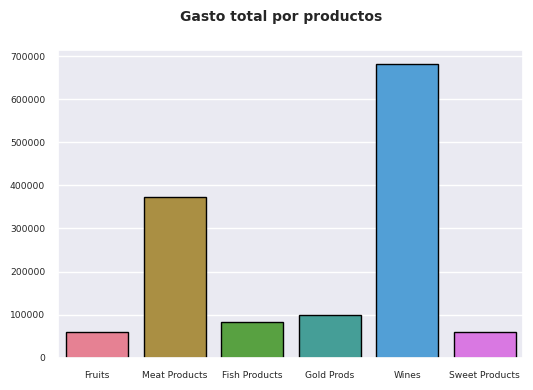

In [130]:

products_list = ['Fruits', 'Meat Products', 'Fish Products', 'Gold Prods', 'Wines', 'Sweet Products']

sum_columns = df[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntWines', 'MntSweetProducts']].sum()
plt.figure(figsize=(6,4))
plt.suptitle("Gasto total por productos ",fontweight="bold", fontsize=10)
sns.barplot(y=sum_columns, x=products_list, palette='husl', data=df, edgecolor='black')
plt.show()



En este punto, de lo expresado en los gráficos se puede observar que en todas las categorías de productos, los clientes que han aceptado la oferta última, han gastado o consumido más. Esta tendencia es clara, y se da con más fuerza en los productos: Vinos y Carnes.
Podríamos hacer una primera conclusión que a mayor gasto, mayor aceptación de la oferta.

Al mismo tiempo, en el segundo gráfico se observa el consumo total por producto en los últimos 2 años, y se destacan claramente como los más consumidos, los productos: VINOS y CARNES.

-   2.3.3. Análisis de últimas compras realizadas

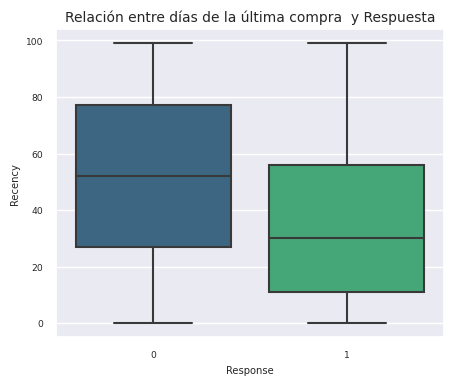

In [194]:
plt.rcParams['figure.figsize'] = (5, 4)
sns.boxplot(x=df['Response'], y=df['Recency'], palette = 'viridis')
plt.title('Relación entre días de la última compra  y Respuesta', fontsize = 10)
plt.show()

Se puede observar que los clientes que han aceptado o dado una respuesta positiva a la oferta de la última campaña, son los que han compras màs recientemente, entre los últimos 15 y casi 60 días.



---



2.4. Variable tiempo

En este punto analizaremos la antiguedad de los clientes de la tienda considerando que tenemos sólo 3 años de datos: 2012, 2013 y 2014.



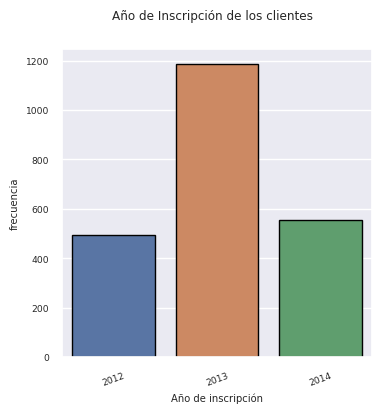

In [132]:
df["Enroll_Year"]=pd.to_datetime(df["Dt_Customer"]).dt.year
df["Enroll_Year"] = df["Enroll_Year"].astype("int64")
plt.figure(figsize=(4,4))
sns.barplot(x = df['Enroll_Year'].value_counts().index,
            y = df['Enroll_Year'].value_counts().values,edgecolor='black')
plt.suptitle('Año de Inscripción de los clientes')
plt.xlabel('Año de inscripción')
plt.ylabel('frecuencia')
plt.xticks(rotation=20)
plt.show()



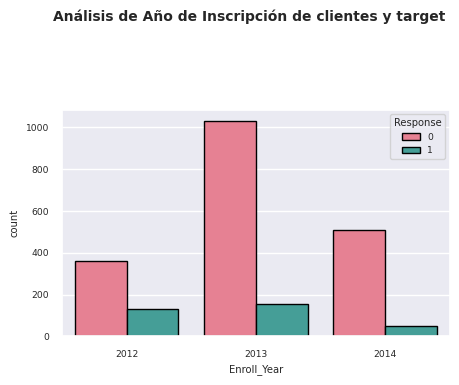

In [133]:
plt.figure(figsize = (5, 10))
plt.suptitle("Análisis de Año de Inscripción de clientes y target",fontweight="bold", fontsize=10)
plt.subplot(3,1,1)
sns.countplot(x = 'Enroll_Year', hue = 'Response', palette = 'husl', data = df,edgecolor='black')
plt.show()

La mayor cantidad de ingreso de clientes se ha dado claramente en el año 2013, duplicando la cantidad de clientes de los otros años bajo análisis.

Respecto al comportamiento del cliente con la oferta ofrecida, se observa que en proporción, los más antiguos, es decir, los clientes inscriptos en el 2012 tienen mayor porcentaje de aceptación comparado con los otros años.




---



**3. Análisis general de correlación entre variables**


Para hacer un análisis más específico de las correlaciones de nuestro Df , podemos aplicar el método df.corr con las variables numéricas inicialmente.

In [134]:
df.select_dtypes(exclude=object).corr().round(2)["Response"].sort_values(ascending=False)


Response               1.00
MntWines               0.25
MntMeatProducts        0.24
NumCatalogPurchases    0.22
Income                 0.16
NumWebPurchases        0.15
MntGoldProds           0.14
MntFruits              0.13
MntSweetProducts       0.12
MntFishProducts        0.11
NumStorePurchases      0.04
Year_Birth             0.02
NumWebVisitsMonth     -0.00
Complain               0.00
NumDealsPurchases      0.00
Age                   -0.02
Id                    -0.02
Kidhome               -0.08
Teenhome              -0.15
Enroll_Year           -0.17
Recency               -0.20
Name: Response, dtype: float64

Como vimos al inicio, al tener una variable target tan desbalanceada con sólo un 15% de valores 1 (positivos), es más dificultoso encontrar correlaciones, tal como se muestra en este último análisis, en el cual ninguna variable numérica supera el 0.25, ni positiva ni negativa.
Considero que hay que seguir las correlaciones de todas las variables numéricas, que son la mayoría del Dataset, para ir encontrando los factores que influyen en la respuesta positiva de los clientes.

**4. Ingeniería de atributos**

Encodear variables tipo object


In [135]:
var_categoricas = df.select_dtypes(include=['object']).columns
print(var_categoricas)

Index(['Education', 'Marital_Status'], dtype='object')


In [136]:
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow']


In [137]:
from sklearn import preprocessing

for col in ['Education', 'Marital_Status']:
    le = preprocessing.LabelEncoder()
    le.fit(df[col].unique())
    df[col] = le.transform(df[col])
    print(f"(col): {df[col].unique()}")







(col): [2 4 0 3 1]
(col): [0 2 1 3 4]


In [138]:
df.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Enroll_Year
0,1826,1970,2,0,84835,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,53,2014
1,1,1961,2,2,57091,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,62,2014
2,10476,1958,2,1,67267,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,65,2014
3,1386,1967,2,3,32474,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,56,2014
4,5371,1989,2,2,21474,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,34,2014
5,7348,1958,4,2,71691,0,0,2014-03-17,0,336,...,43,1,4,7,5,2,1,0,65,2014
6,4073,1954,0,1,63564,0,0,2014-01-29,0,769,...,65,1,10,10,7,6,1,0,69,2014
7,1991,1967,2,3,44931,0,1,2014-01-18,0,78,...,7,1,2,1,3,5,0,0,56,2014
8,4047,1954,4,1,65324,0,1,2014-11-01,0,384,...,5,3,6,2,9,4,0,0,69,2014
9,9477,1954,4,1,65324,0,1,2014-11-01,0,384,...,5,3,6,2,9,4,0,0,69,2014


Para seguir avanzando en el análisis de la correlación entre las variables y detectar cuáles podrían ser las que están más relacionadas, vamos a hacer un Heathmap.

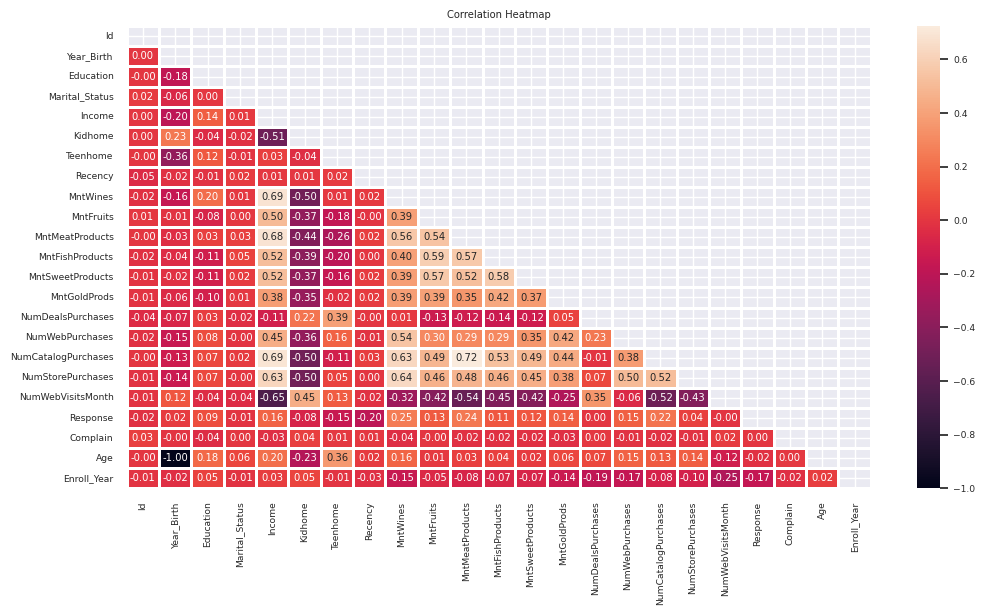

In [139]:
plt.figure(dpi = None,figsize= (12,6))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.set(font_scale=0.6)

sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True ,lw=1,cmap = None)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Como conclusión de este Heatmap, se puede observar lo que ya era evidente cuando aplicamos  método .corr: no hay ninguna correlación significativa entre alguna variable en particular y la target. La mayor correlación ( aunque no significativa) la tienen: MntWines (la cantidad gastada en vinos en los últimos 2 años) **0,25**, MntMeatsProducts (la cantidad gastada en productos cárnicos en los últimos 2 años) **0.24** y NumCatalogPurchases ( cantidad de compras con descuento hechas por catálogo para ser enviadas por correo) **0.22**.
Ahora bien, podemos observar otras correlaciones que se dan, sin tener en cuenta la variable target. Ejemplo: correlación entre MntMeatsProducts y NumCatalogPurchases del **0.72** , correlación entre NumCatalogPurchases y NumStoregPurchases con MntWines del **0.64**.


Entonces, considero que, si bien, al tener definida una variable Target binaria en el Dataset debería pensar en aplicar un Modelo de Aprendizaje Supervisado de Clasificación como Random Forest Classifier, por ejemplo; al tener desbalanceada la target,tal vez deba probar con algunas técnicas para balancearla y al mismo tiempo aplicar algún Modelo de Aprendizaje No supervizado ( Clustering o Asociación) que me pueden ser útiles para detectar segmentos de clientes y aplicarnos inclusive luego al modelo incial. Esto es una primera consideración pensando en el modelo a aplicar.




-  Caracacterísticas relevantes

Para comenzar con este punto, en principio  hay algunas variables o features que podría eliminar o sacar considerando a simple visa que no me suman información o no tienen peso en el Dataset: Id del cliente , Dt Customer y
 'Year_Birth'(considerando que agregué una columna de Age en base a este dato).


In [140]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Age', 'Enroll_Year'],
      dtype='object')

In [141]:
df1=df.drop(['Year_Birth','Dt_Customer','Id'],axis=1)
df1.head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Enroll_Year
0,2,0,84835,0,0,0,189,104,379,111,...,218,1,4,4,6,1,1,0,53,2014
1,2,2,57091,0,0,0,464,5,64,7,...,37,1,7,3,7,5,1,0,62,2014
2,2,1,67267,0,1,0,134,11,59,15,...,30,1,3,2,5,2,0,0,65,2014
3,2,3,32474,1,1,0,10,0,1,0,...,0,1,1,0,2,7,0,0,56,2014
4,2,2,21474,1,0,0,6,16,24,11,...,34,2,3,1,2,7,1,0,34,2014
5,4,2,71691,0,0,0,336,130,411,240,...,43,1,4,7,5,2,1,0,65,2014
6,0,1,63564,0,0,0,769,80,252,15,...,65,1,10,10,7,6,1,0,69,2014
7,2,3,44931,0,1,0,78,0,11,0,...,7,1,2,1,3,5,0,0,56,2014
8,4,1,65324,0,1,0,384,0,102,21,...,5,3,6,2,9,4,0,0,69,2014
9,4,1,65324,0,1,0,384,0,102,21,...,5,3,6,2,9,4,0,0,69,2014


Como se vió y analizó tanto con el método .corr com con el Heatmap, no hay una correlación significativa de ninguna feature con la target Response. Y al mismo tiempo ya se mencionó previamente que la Target está desbalanceada (15%: 1 y 85%: 0).


-  Estandarización de datos

  Preparamos nuestro dataframe

In [142]:
X = df1.drop('Response', axis = 1)
X = X.values
y = df1['Response']

X.shape,y.shape


((2236, 20), (2236,))

In [143]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard

array([[-0.35213278, -1.63492992,  1.5360848 , ..., -0.09500143,
        -0.09417994,  1.41998845],
       [-0.35213278,  0.25042506,  0.24004082, ..., -0.09500143,
         0.67500721,  1.41998845],
       [-0.35213278, -0.69225243,  0.71540643, ..., -0.09500143,
         0.93140293,  1.41998845],
       ...,
       [-0.35213278, -1.63492992, -0.263587  , ..., -0.09500143,
        -0.60697138, -1.50098135],
       [-0.35213278, -0.69225243,  0.647764  , ..., -0.09500143,
        -0.77790186, -1.50098135],
       [ 1.4292448 , -0.69225243,  2.0049104 , ..., -0.09500143,
        -0.0087147 , -1.50098135]])

**5. Modelos de predicción**

  Realizaremos el entrenamiento y testeo de diferentes modelos de ML.

*  **Standard Random Forest**:  
  Seleccionamos inicialmente el modelo SRF.

  Utilizamos un **muestreo estratificado** , asegurando la división aleatoria de los datos y manteniendo la misma distribución de clases desequilibrada para cada subconjunto. La versión modificada de K-Fold Cross Validation, es decir, la validación cruzada estratificada de K-Fold, requiere la distribución de clases coincidente con el conjunto de datos de entrenamiento completo en cada división.
  Y luego aplicamos las métricas para evaluar el rendimiento.

In [144]:
%%time

import warnings

warnings.filterwarnings("ignore")

SRF = RandomForestClassifier(n_estimators=150, random_state=0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


scoring = {
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


scores = cross_validate(SRF, X_standard, y, scoring=scoring, cv=cv)


print('Mean f1: %.3f' % np.mean(scores['test_f1']))
print('Mean recall: %.3f' % np.mean(scores['test_recall']))
print('Mean precision: %.3f' % np.mean(scores['test_precision']))

Mean f1: 0.387
Mean recall: 0.277
Mean precision: 0.663
CPU times: user 21.8 s, sys: 48.1 ms, total: 21.8 s
Wall time: 22 s


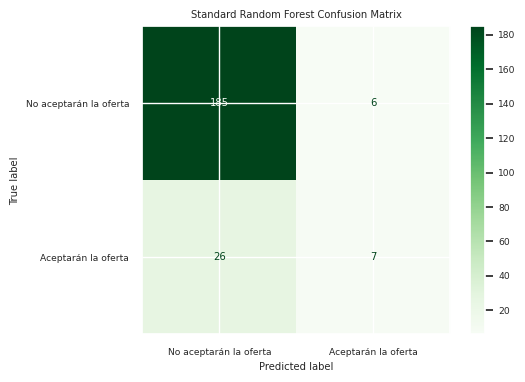

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       191
           1       0.54      0.21      0.30        33

    accuracy                           0.86       224
   macro avg       0.71      0.59      0.61       224
weighted avg       0.83      0.86      0.83       224



In [145]:

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.1, stratify=y)

SRF.fit(X_train, y_train)

y_pred = SRF.predict(X_test)

conf_matrix = ConfusionMatrixDisplay.from_estimator(SRF, X_test, y_test, display_labels=['No aceptarán la oferta', 'Aceptarán la oferta'],cmap='Greens')
plt.title('Standard Random Forest Confusion Matrix')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Al inspeccionar la matriz de confusión, la mayoría de los resultados predichos son falsos negativos y verdaderos negativos. Este resultado tiene un fuerte sesgo en la predicción del resultado como clase mayoritaria, ya que hay muchas más muestras de datos de entrenamiento que la clase minoritaria.

- Random Forest Standard con Smote aplicado


  a)  Aplicamos el metodo SMOTE (técnica de sobremuestreo de minorías sintéticas) para balancear la variable target dentro del modelo SRF

 b)  Aplicamos Cross Validation

 c)   Luego aplicamos las métricas.

In [146]:
from imblearn.over_sampling import SMOTE

oversample     = SMOTE()
over_X, over_y = oversample.fit_resample(X_standard, y)

over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)


In [147]:

import warnings

warnings.filterwarnings("ignore")

SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


scoring = {
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)

print('Mean f1: %.3f' % np.mean(scores['test_f1']))
print('Mean recall: %.3f' % np.mean(scores['test_recall']))
print('Mean precision: %.3f' % np.mean(scores['test_precision']))


Mean f1: 0.945
Mean recall: 0.953
Mean precision: 0.936


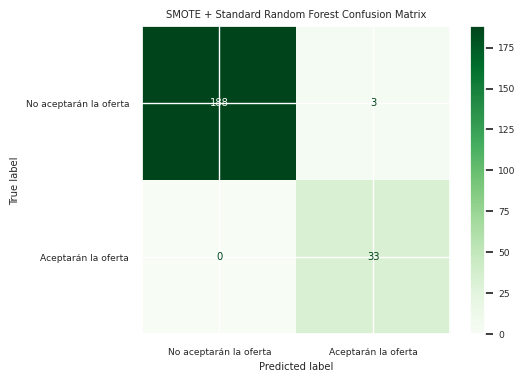

-----------------------------------------------------------------------
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       190
           1       0.92      0.95      0.93       191

    accuracy                           0.93       381
   macro avg       0.93      0.93      0.93       381
weighted avg       0.93      0.93      0.93       381

-----------------------------------------------------------------------


In [148]:

SMOTE_SRF.fit(over_X_train, over_y_train)

y_pred = SMOTE_SRF.predict(over_X_test)

conf_matrix = ConfusionMatrixDisplay.from_estimator(SMOTE_SRF, X_test, y_test, display_labels=['No aceptarán la oferta', 'Aceptarán la oferta'],cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

print("-----------------------------------------------------------------------")
print("Reporte de clasificación")
print(classification_report(over_y_test, y_pred))
print("-----------------------------------------------------------------------")

Observamos que aplicando eL método SMOTE , hemos mejorado el Accuracy, pero también el Racall y la Precisión, minimizando los falsos negativos y falsos positivos.

Curva de ROC  SMOTE Random Forest Classifier


 roc_auc_score :  0.99714


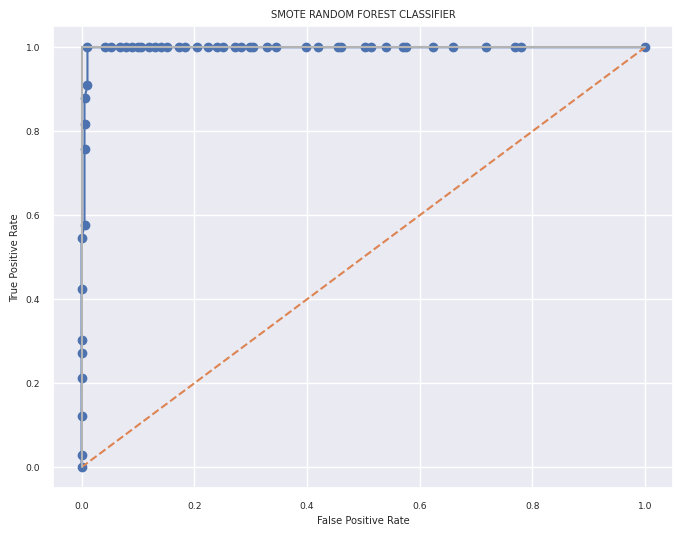

In [192]:
# AREA DE LA CURVA ROC
y_score1 = SMOTE_SRF.predict_proba(X_test)[:,1]
# Calculo de tasas
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
roc_10_7_1_2 = round(roc_auc_score(y_test, y_score1),5)
print('\n roc_auc_score : ', roc_10_7_1_2)

plt.subplots(1, figsize=(8,6))
plt.title('SMOTE RANDOM FOREST CLASSIFIER' )
plt.plot(false_positive_rate1, true_positive_rate1, marker = 'o')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Optimización de hiperparametros para evitar overfiting en el Random Forest Clasiffier

Intentaremos ajustar el siguiente conjunto de hiperparámetros:

* n_estimators = número de árboles en el bosque
* max_features = número máximo de características consideradas para dividir un nodo
* max_profundidad = número máximo de niveles en cada árbol de decisión
* min_samples_split = número mínimo de puntos de datos colocados en un nodo antes de dividir el nodo
* min_samples_leaf = número mínimo de puntos de datos permitidos en un nodo hoja
* bootstrap = método para muestrear puntos de datos (con o sin reemplazo)

a) Random Search

In [187]:

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, num =10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 6, 8, 10, 11, 13, 15, 16, 18, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [188]:
rf = RandomForestClassifier(random_state=123)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(over_X_train, over_y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 6, 8, 10, 11, 13, 15,
                                                      16, 18, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [189]:
rf_random.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [190]:
print(confusion_matrix(y_train, rf_random.predict(X_train)))
print(classification_report(y_train, rf_random.predict(X_train)))

print(confusion_matrix(y_test, rf_random.predict(X_test)))
print(classification_report(y_test, rf_random.predict(X_test)))

[[1686   25]
 [  11  290]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1711
           1       0.92      0.96      0.94       301

    accuracy                           0.98      2012
   macro avg       0.96      0.97      0.97      2012
weighted avg       0.98      0.98      0.98      2012

[[187   4]
 [  1  32]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       191
           1       0.89      0.97      0.93        33

    accuracy                           0.98       224
   macro avg       0.94      0.97      0.96       224
weighted avg       0.98      0.98      0.98       224



Importancia de las caracetrísticas en el Random Forest Classifier con Random Search aplicado.

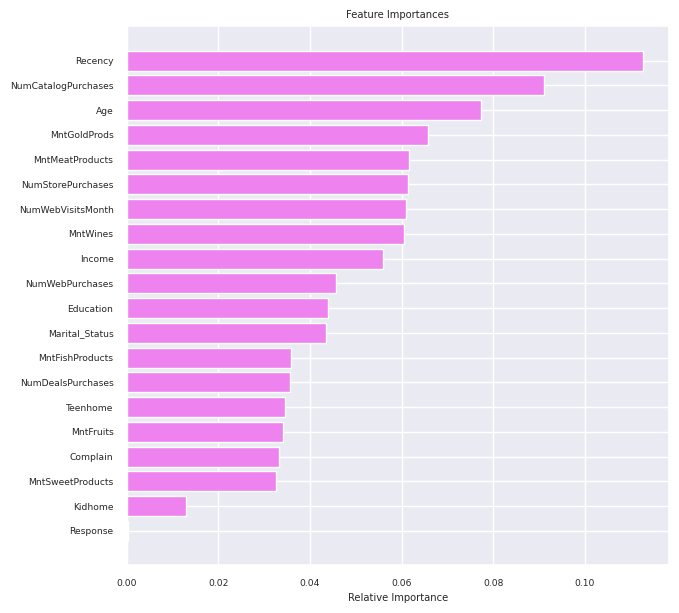

In [69]:

best_estimator = rf_random.best_estimator_
feature_names=df1.columns

feature_importances = best_estimator.feature_importances_


indices = np.argsort(feature_importances)

plt.figure(figsize=(7, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feature_importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

b) Grid-Search

In [70]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 5, 8, 10],
    'n_estimators': [20,30, 40, 50, 60]
}

rf = RandomForestClassifier(random_state=123)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(over_X_train, over_y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30, 40],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [3, 5, 8, 10],
                         'n_estimators': [20, 30, 40, 50, 60]},
             verbose=2)

In [71]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

In [157]:
print(confusion_matrix(y_train, grid_search.predict(X_train)))
print(classification_report(y_train, grid_search.predict(X_train)))

print(confusion_matrix(y_test, grid_search.predict(X_test)))
print(classification_report(y_test, grid_search.predict(X_test)))

[[1684   27]
 [  32  269]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1711
           1       0.91      0.89      0.90       301

    accuracy                           0.97      2012
   macro avg       0.95      0.94      0.94      2012
weighted avg       0.97      0.97      0.97      2012

[[185   6]
 [  4  29]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       191
           1       0.83      0.88      0.85        33

    accuracy                           0.96       224
   macro avg       0.90      0.92      0.91       224
weighted avg       0.96      0.96      0.96       224



*  **Decision Tree Classifier**

   Aplicamos el Modelo de Arbol de Decisión y luego aplicamos las métricas

In [73]:
DTC = DecisionTreeClassifier( random_state=1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scoring = {
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

scores = cross_validate(DTC, X_standard, y, scoring=scoring, cv=cv)

print('Mean f1: %.3f' % np.mean(scores['test_f1']))
print('Mean recall: %.3f' % np.mean(scores['test_recall']))
print('Mean precision: %.3f' % np.mean(scores['test_precision']))

Mean f1: 0.420
Mean recall: 0.418
Mean precision: 0.425


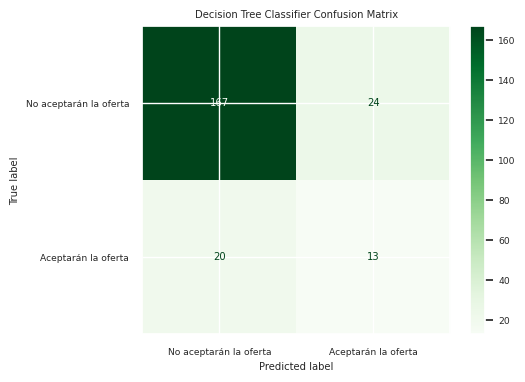

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       191
           1       0.35      0.39      0.37        33

    accuracy                           0.80       224
   macro avg       0.62      0.63      0.63       224
weighted avg       0.81      0.80      0.81       224



In [156]:

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.1, stratify=y)

DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

conf_matrix = ConfusionMatrixDisplay.from_estimator(DTC, X_test, y_test, display_labels=['No aceptarán la oferta', 'Aceptarán la oferta'],cmap='Greens')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

-    Aplicamos SMOTE al modelo Decision Tree Classifier

In [162]:
SMOTE_DTC = DecisionTreeClassifier(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scoring = {
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


scores = cross_validate(SMOTE_DTC, over_X, over_y, scoring=scoring, cv=cv)

print('Mean f1: %.3f' % np.mean(scores['test_f1']))
print('Mean recall: %.3f' % np.mean(scores['test_recall']))
print('Mean precision: %.3f' % np.mean(scores['test_precision']))

Mean f1: 0.878
Mean recall: 0.885
Mean precision: 0.872


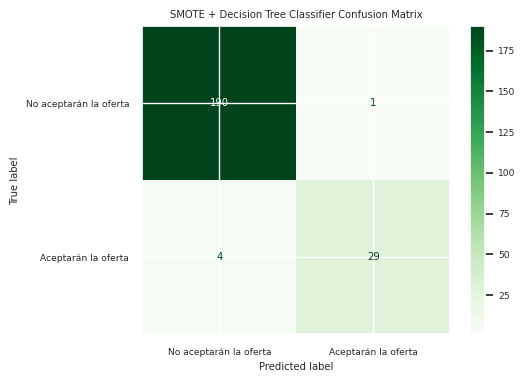

-----------------------------------------------------------------------
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       190
           1       0.92      0.90      0.91       191

    accuracy                           0.91       381
   macro avg       0.91      0.91      0.91       381
weighted avg       0.91      0.91      0.91       381

-----------------------------------------------------------------------


In [163]:

SMOTE_DTC.fit(over_X_train, over_y_train)

y_pred = SMOTE_DTC.predict(over_X_test)


conf_matrix = ConfusionMatrixDisplay.from_estimator(SMOTE_DTC, X_test, y_test, display_labels=['No aceptarán la oferta', 'Aceptarán la oferta'],cmap='Greens')
plt.title('SMOTE + Decision Tree Classifier Confusion Matrix')
plt.show()

print("-----------------------------------------------------------------------")
print("Reporte de clasificación")
print(classification_report(over_y_test, y_pred))
print("-----------------------------------------------------------------------")

-   Optimización de hiperparámetros para mejorar el rendimiento del Decision Tree Classifier

In [164]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(over_X_train, over_y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)

Mín Split:  5
Max Nvl:  11
Algorithm:  entropy


In [165]:
gridDecisionTree.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 5}

In [166]:
print(confusion_matrix(y_train, gridDecisionTree.predict(X_train)))
print(classification_report(y_train,gridDecisionTree.predict(X_train)))

print(confusion_matrix(y_test, gridDecisionTree.predict(X_test)))
print(classification_report(y_test, gridDecisionTree.predict(X_test)))

[[1670   41]
 [  42  259]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1711
           1       0.86      0.86      0.86       301

    accuracy                           0.96      2012
   macro avg       0.92      0.92      0.92      2012
weighted avg       0.96      0.96      0.96      2012

[[187   4]
 [  5  28]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       191
           1       0.88      0.85      0.86        33

    accuracy                           0.96       224
   macro avg       0.92      0.91      0.92       224
weighted avg       0.96      0.96      0.96       224



**Regresión Logística**

-  Aplicamos el modelo Regresión Logística y luego aplicamos las métricas.

In [167]:
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

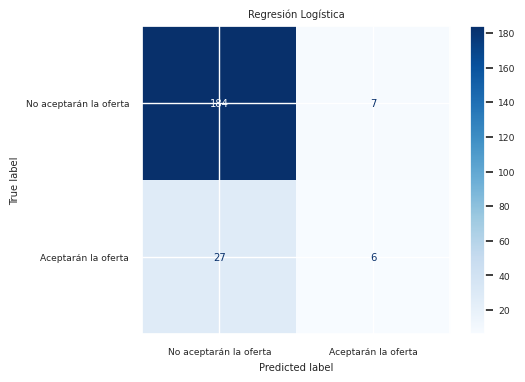

-----------------------------------------------------------------------
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       191
           1       0.46      0.18      0.26        33

    accuracy                           0.85       224
   macro avg       0.67      0.57      0.59       224
weighted avg       0.81      0.85      0.82       224

-----------------------------------------------------------------------


In [168]:
conf_matrix = ConfusionMatrixDisplay.from_estimator(logistic, X_test, y_test, display_labels=['No aceptarán la oferta', 'Aceptarán la oferta'],cmap='Blues')
plt.title('Regresión Logística')
plt.show()

from sklearn.metrics import classification_report
print("-----------------------------------------------------------------------")
print("Reporte de clasificación")
print(classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------")

* Regresión Logística con SMOTE aplicado

In [175]:
from imblearn.over_sampling import SMOTE

oversample     = SMOTE()
over_X, over_y = oversample.fit_resample(X_standard, y)

over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)

In [176]:


import warnings


warnings.filterwarnings("ignore")

SMOTE_LR= LogisticRegression(random_state = 1, max_iter=1000)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scoring = {
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


scores = cross_validate(SMOTE_LR, over_X, over_y, scoring=scoring, cv=cv)


print('Mean f1: %.3f' % np.mean(scores['test_f1']))
print('Mean recall: %.3f' % np.mean(scores['test_recall']))
print('Mean precision: %.3f' % np.mean(scores['test_precision']))

Mean f1: 0.787
Mean recall: 0.791
Mean precision: 0.785


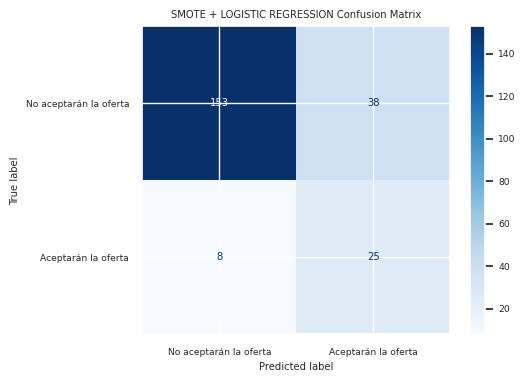

-----------------------------------------------------------------------
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       191
           1       0.80      0.79      0.79       190

    accuracy                           0.80       381
   macro avg       0.80      0.80      0.80       381
weighted avg       0.80      0.80      0.80       381

-----------------------------------------------------------------------


In [177]:
SMOTE_LR.fit(over_X_train, over_y_train)

y_pred = SMOTE_LR.predict(over_X_test)


conf_matrix = ConfusionMatrixDisplay.from_estimator(SMOTE_LR, X_test, y_test, display_labels=['No aceptarán la oferta', 'Aceptarán la oferta'],cmap='Blues')
plt.title('SMOTE + LOGISTIC REGRESSION Confusion Matrix')
plt.show()

from sklearn.metrics import classification_report
print("-----------------------------------------------------------------------")
print("Reporte de clasificación")
print(classification_report(over_y_test, y_pred))
print("-----------------------------------------------------------------------")

*  Curva de ROC  SMOTE + Regresión Logística


 roc_auc_score :  0.87387


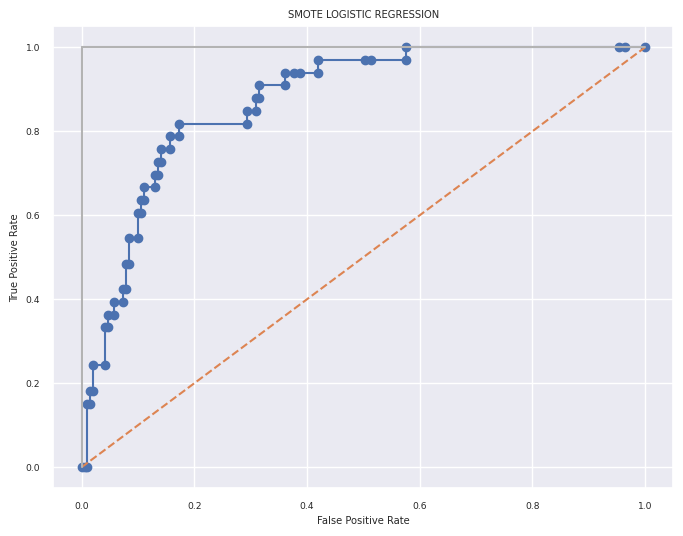

In [85]:
# AREA DE LA CURVA ROC
y_score1 = SMOTE_LR.predict_proba(X_test)[:,1]
# Calculo de tasas
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
roc_10_7_1_2 = round(roc_auc_score(y_test, y_score1),5)
print('\n roc_auc_score : ', roc_10_7_1_2)

plt.subplots(1, figsize=(8,6))
plt.title('SMOTE LOGISTIC REGRESSION' )
plt.plot(false_positive_rate1, true_positive_rate1, marker = 'o')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**6. Conclusiones finales**

Hemos entrenado , testeado y validado 3 diferentes modelos de apendizaje supervisado de clasificación: Random Forest Classifier, Decision Tree Classifier y Logistic Regresion.

Se ha utilizado en todos los casos un muestreo estratificado, se ha aplicado luego la técnica SMOTE para balancear nuestra variable target y se han optimizado hiperparámetros.

Si bien, los tres modelos obtuvieron un buen rendimiento luego de todo el proceso, la mejor performance, considerando no sólo la métrica Accuracy, sino también la métrica o score F1 que es importante porque nos interesa minimizar los Falsos negativos, ha sido en modelo Random Forest Classsifier con SMOTE y tuneado con Random Search.
Así lo muestra el reporte:

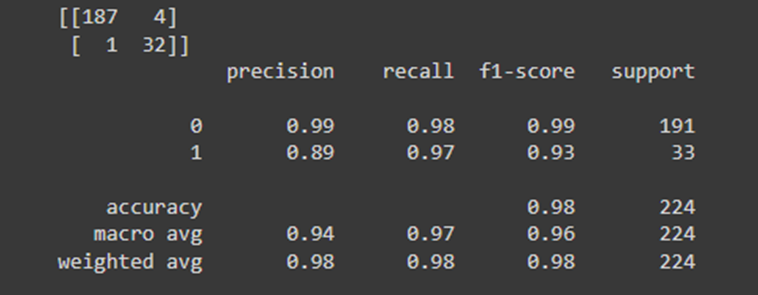


Precisión: La precisión es la proporción de predicciones positivas correctas (verdaderos positivos) sobre el total de predicciones positivas (verdaderos positivos + falsos positivos). En este caso, la precisión para la clase 0 es de 1 y para la clase 1 es del 94%. Esto indica que el modelo tiene una alta precisión en predecir ambas clases.

Recall: El recall es la proporción de instancias positivas correctamente clasificadas (verdaderos positivos) sobre el total de instancias positivas (verdaderos positivos + falsos negativos). Aquí, el recall para la clase 0 es del 99%, lo cual indica que el modelo tiene una alta capacidad para detectar instancias de la clase 0 (no aceptación de la oferta). Y el recall para la clase 1 es del 1, lo cual sugiere que el modelo tiene una óptima capacidad para minimizar los falsos negativos, es decir, detecta muy bien a las personas que sí van a aceptar al oferta, y no las predice erróneamente. **Este item es muy importante para este caso de uso, ya que se busca minimizar el costo de llamar a todos los clientes, pero al mismo tiempo, no dejar a ningún cliente que va a aceptar la oferta sin contactar.**

F1-score: El F1-score es una medida que combina la precisión y el recall en un solo valor, proporcionando una métrica global del rendimiento del modelo. Es útil cuando hay un desequilibrio en las clases. Aquí, el F1-score para la clase 0 es del 99%, indicando un buen equilibrio entre precisión y recall, al igual que para la clase 1 con un 97%.

Accuracy (exactitud) que muestra la proporción de predicciones correctas sobre el total de instancias. En este caso, el accuracy es del 99%, lo cual indica que el modelo tiene un rendimiento general muy bueno en la clasificación.

Por otro lado, la Curva de ROC del modelo nos muestra un score del   99.71 % ,  lo que indica que el modelo es muy bueno para distinguir entre las clases positivas y negativas.